<div style="text-align: center;">
  <img src="./imagens/logo_novaims.png" alt="Logo" style="width: 150px; height: auto; margin-bottom: 10px;">
  <h1 style="margin: 0;"><strong>Machine Learning Project: Amazing International Airlines Inc.</strong></h1>
  <h2 style="margin: 0;"><strong>Part 1/2: Exploratory Data Analysis</strong></h2>
</div>

<div style="text-align: left; margin-top: 15px;">
  <p style="margin: 0;"><strong>Group 51:</strong></p>
  <ul style="margin: 0; padding-left: 20px;">
    <li>André Ferreira | 20250398</li>
    <li>Fausto Gomes | 20221915</li>
    <li>Maria Francisca Gonçalves | 20221942</li>
    <li>Miguel Matos | 20221925</li>
  </ul>
</div>

---
#### <font> Table of Contents </font> <a class="anchor" id='toc'></a> 
0. [Context](#introduction)
1. [Imports](#Imports)  
2. [Exploratory Data Analysis - Customer Data](#exploratory-data-analysis)
- 2.1. [Data Understanding](#data-understanding)
- 2.2. [Data Cleaning before visualizations](#data-preparation-for-visualizations)
- 2.3. [GeoData](#geodata)
- 2.4. [Univariate Numeric Distribution](#univariate-numeric-distribution)
- 2.5. [Numerical Bivariate analysis](#numerical-bivariate-analysis)
- 2.6. [Univariate Categorical Distribution](#univariate-categorical-distribution)

- 2.7. [Bivariate Categorical Distribution](#bivariate-categorical-distribution)
 
3. [Exploratory Data Analysis - Flights Data](#3-flights-data)

- 3.1. [Data Understanding](#data-understanding)

- 3.2. [Data Cleaning before visualizations](#data-preparation-for-visualizations)
- 3.3. [Univariate Numeric Distribution](#univariate-numeric-distribution)
- 3.4. [Numerical Bivariate analysis](#numerical-bivariate-analysis)
- 3.5. [Univariate Categorical Distribution](#univariate-categorical-distribution)



----

# <span style="color:#0097b2">0. Context</span>
[Back to TOC](#toc)

# <span style="color:#0097b2">1. Imports</span>
[Back to TOC](#toc)

In [1]:
from functions import *
customer_data = pd.read_csv("Data/DM_AIAI_CustomerDB.csv", index_col = 0)
flights_data = pd.read_csv("Data/DM_AIAI_FlightsDB.csv", date_format = "YearMonthDate")
metadata = pd.read_csv("Data/DM_AIAI_Metadata.csv", sep= ";")

pd.set_option("display.max_columns", None)

# <span style="color:#0097b2">2. Exploratory Data Analysis</span>

# <span style="color:#0097b2">2.1 Data Understanding - Customer Data</span>
[Back to TOC](#toc)

In [2]:
customer_data.shape

(16921, 20)

In custoar data we have almost 17k entries.

In [3]:
customer_data.head()

Loyalty# First Name    Last Name        Customer Name Country  \
0    480934    Cecilia  Householder  Cecilia Householder  Canada   
1    549612      Dayle        Menez          Dayle Menez  Canada   
2    429460     Necole       Hannon        Necole Hannon  Canada   
3    608370      Queen        Hagee          Queen Hagee  Canada   
4    530508     Claire      Latting       Claire Latting  Canada   

  Province or State       City   Latitude   Longitude Postal code  Gender  \
0           Ontario    Toronto  43.653225  -79.383186     M2Z 4K1  female   
1           Alberta   Edmonton  53.544388 -113.490930     T3G 6Y6    male   
2  British Columbia  Vancouver  49.282730 -123.120740     V6E 3D9    male   
3           Ontario    Toronto  43.653225  -79.383186     P1W 1K4    male   
4            Quebec       Hull  45.428730  -75.713364     J8Y 3Z5    male   

  Education Location Code   Income Marital Status LoyaltyStatus  \
0  Bachelor         Urban  70146.0        Married          Star   
1   College         Rural      0.0       Divorced          Star   
2   College         Urban      0.0         Single          Star   
3   College      Suburban      0.0         Single          Star   
4  Bachelor      Suburban  97832.0        Married          Star   

  EnrollmentDateOpening CancellationDate  Customer Lifetime Value  \
0             2/15/2019              NaN                  3839.14   
1              3/9/2019              NaN                  3839.61   
2             7/14/2017         1/8/2021                  3839.75   
3             2/17/2016              NaN                  3839.75   
4            10/25/2017              NaN                  3842.79   

   EnrollmentType  
0        Standard  
1        Standard  
2        Standard  
3        Standard  
4  2021 Promotion

First insights from a small look at the data:
- Probably "Loyalty" works like an ID.

- Maybe we can drop the columns "First Name", "Last Name", "Customer Name" as they don't give any value.

- "Latitude" and "Longitude" will be useful to look for the customers location.

- "Postal Code" might have too many unique values and not give that much value, so maybe drop.

- "Location Code" is already the 5th variable about location, so maybe too redundant.

- "EnrollmentDateOpening" is to convert for days as customer.

In [4]:
customer_data.tail()

Loyalty# First Name Last Name    Customer Name Country Province or State  \
15    100012      Ethan  Thompson   Ethan Thompson  Canada            Quebec   
16    100013      Layla     Young      Layla Young  Canada           Alberta   
17    100014     Amelia   Bennett   Amelia Bennett  Canada     New Brunswick   
18    100015   Benjamin    Wilson  Benjamin Wilson  Canada            Quebec   
19    100016       Emma    Martin      Emma Martin  Canada  British Columbia   

            City   Latitude   Longitude Postal code  Gender Education  \
15   Quebec City  46.759733  -71.141009     Y0C 7D6    male  Bachelor   
16      Edmonton  53.524829 -113.546357     L3S 9Y3  female  Bachelor   
17       Moncton  46.051866  -64.825428     G2S 2B6    male  Bachelor   
18   Quebec City  46.862970  -71.133444     B1Z 8T3  female   College   
19  Dawson Creek  55.720562 -120.160090     M4A 1E4  female    Master   

   Location Code  Income Marital Status LoyaltyStatus EnrollmentDateOpening  \
15      Suburban     NaN         Single          Star             2/27/2019   
16         Rural     NaN        Married          Star             9/20/2017   
17         Rural     NaN        Married          Star            11/28/2020   
18         Urban     NaN        Married          Star              4/9/2020   
19      Suburban     NaN         Single          Star             7/21/2020   

   CancellationDate  Customer Lifetime Value EnrollmentType  
15        2/27/2019                      NaN       Standard  
16        9/20/2017                      NaN       Standard  
17       11/28/2020                      NaN       Standard  
18         4/9/2020                      NaN       Standard  
19        7/21/2020                      NaN       Standard

- In the column "CancellationDate" we can verify that there are a lot of customers that enrolled and canceled in the same day. We need to look at that.

- Here we can see that when the variable "Income" has a missing value, the variable "Customer Lifetime Value" has a missing value as well, and this happens when customers enter the program and exit in the same day, so this might be customers to remove, becasue they probably don't have flights in recorded in the flights data.

 - CLV = average value of sale x average number of transactions x average customer lifespan.

In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16921 entries, 0 to 19
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loyalty#                 16921 non-null  int64  
 1   First Name               16921 non-null  object 
 2   Last Name                16921 non-null  object 
 3   Customer Name            16921 non-null  object 
 4   Country                  16921 non-null  object 
 5   Province or State        16921 non-null  object 
 6   City                     16921 non-null  object 
 7   Latitude                 16921 non-null  float64
 8   Longitude                16921 non-null  float64
 9   Postal code              16921 non-null  object 
 10  Gender                   16921 non-null  object 
 11  Education                16921 non-null  object 
 12  Location Code            16921 non-null  object 
 13  Income                   16901 non-null  float64
 14  Marital Status           16921

All the dtypes seem to be accordingly, except to "EnrollmentDateOpening" and "CancellationDate" which should be a datetime data type.

In [6]:
customer_data.describe(include= np.number).drop("Loyalty#", axis = 1)

Latitude     Longitude        Income  Customer Lifetime Value
count  16921.000000  16921.000000  16901.000000             16901.000000
mean      47.174500    -91.814768  37758.038400              7990.460188
std        3.307971     22.242429  30368.992499              6863.173093
min       42.984924   -135.056840      0.000000              1898.010000
25%       44.231171   -120.237660      0.000000              3979.720000
50%       46.087818    -79.383186  34161.000000              5780.180000
75%       49.282730    -74.596184  62396.000000              8945.690000
max       60.721188    -52.712578  99981.000000             83325.380000

- The variance in "Income" variable is extremely high, specially due to the fact of the minimum being 0.

- "Customer Lifetime Value" seems to have a similar behaviour as "Income", probabluy because this two features might be very correlated.

In [7]:
customer_data.describe(exclude= np.number)

First Name Last Name        Customer Name Country Province or State  \
count       16921     16921                16921   16921             16921   
unique       4941     15404                16921       1                11   
top          Deon   Salberg  Cecilia Householder  Canada           Ontario   
freq           13         4                    1   16921              5468   

           City Postal code  Gender Education Location Code Marital Status  \
count     16921       16921   16921     16921         16921          16921   
unique       29          75       2         5             3              3   
top     Toronto     V6E 3D9  female  Bachelor      Suburban        Married   
freq       3390         917    8497     10586          5716           9842   

       LoyaltyStatus EnrollmentDateOpening CancellationDate EnrollmentType  
count          16921                 16921             2310          16921  
unique             3                  2449             1260              2  
top             Star              4/3/2015         7/7/2020       Standard  
freq            7761                    34                8          15773

- "Country" is a variable that we'll probably delete as well, as we can see by here it only contains the value "Canada".

- "Location Code" seems to be important as only contains 3 unique values.

- "City" and "Postal code" might be irrelevant compared to other variables we have.


There a lot of categorical values, but let's take a look at the unique values.

In [8]:
non_metric_features = customer_data.select_dtypes(exclude= np.number).drop(["First Name","Last Name","Customer Name", "Country", "EnrollmentDateOpening","CancellationDate"], axis = 1)
for feature in non_metric_features:
    print(f"The unique values of {feature} are: \n\n {customer_data[feature].unique()} \n")

The unique values of Province or State are: 

 ['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island'] 

The unique values of City are: 

 ['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Moncton' 'Fredericton' 'Ottawa' 'Tremblant'
 'Calgary' 'Whistler' 'Thunder Bay' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Victoria' 'Regina' 'Kelowna'
 "St. John's" 'Kingston' 'Banff' 'Charlottetown'] 

The unique values of Postal code are: 

 ['M2Z 4K1' 'T3G 6Y6' 'V6E 3D9' 'P1W 1K4' 'J8Y 3Z5' 'Y2K 6R0' 'P5S 6R4'
 'K8V 4B2' 'H2Y 2W2' 'M8Y 4K8' 'U5I 4F1' 'G1B 3L5' 'H4G 3T4' 'M2M 7K8'
 'M2M 6J7' 'E1A 2A7' 'E3B 2H2' 'M1R 4K3' 'T9G 1W3' 'H2Y 4R4' 'V5R 1W3'
 'P1L 8X8' 'K1F 2R2' 'H5Y 2S9' 'V1E 4R6' 'H2T 2J6' 'T3E 2V9' 'V6T 1Y8'
 'H2T 9K8' 'K8T 5M5' 'P2T 6G3' 'T9O 2W2' 'V6E 3Z3' 'R6Y 4T5' 'M5V 1G5'
 'V6V 8Z3' 'B3J 9S2' 'M5B 3

# Data Cleaning before visualizations

## Duplicates

In [9]:
customer_data[customer_data.duplicated(subset=["Loyalty#"])]

Loyalty# First Name  Last Name      Customer Name Country  \
370      354438      Marla   Heinicke     Marla Heinicke  Canada   
1986     687951      Burma    Cordill      Burma Cordill  Canada   
2322     615439     Thalia      Cabos       Thalia Cabos  Canada   
2416     156031       Onie      Grech         Onie Grech  Canada   
2442     825593       Rose   Mcgregor      Rose Mcgregor  Canada   
...         ...        ...        ...                ...     ...   
16488    373638    Sherryl    Vanduyn    Sherryl Vanduyn  Canada   
16625    727507     Marnie     Kisner      Marnie Kisner  Canada   
16766    278854    Marylee  Villicana  Marylee Villicana  Canada   
16775    434807       Cira     Nalley        Cira Nalley  Canada   
16881    368073    Enedina   Dickason   Enedina Dickason  Canada   

      Province or State         City   Latitude   Longitude Postal code  \
370             Ontario      Toronto  43.653225  -79.383186     M8Y 4K8   
1986             Quebec     Montreal  45.501690  -73.567253     H2Y 4R4   
2322            Ontario      Toronto  43.653225  -79.383186     P1J 8T7   
2416             Quebec     Montreal  45.501690  -73.567253     H2Y 2W2   
2442            Ontario      Toronto  43.653225  -79.383186     P5S 6R4   
...                 ...          ...        ...         ...         ...   
16488            Quebec    Tremblant  46.118462  -74.596184     H5Y 2S9   
16625           Alberta        Banff  51.178398 -115.570800     T4V 1D4   
16766            Quebec    Tremblant  46.118462  -74.596184     H5Y 2S9   
16775           Alberta     Edmonton  53.544388 -113.490930     T9G 1W3   
16881            Quebec  Quebec City  46.813877  -71.207977     G1B 3L5   

       Gender             Education Location Code   Income Marital Status  \
370      male              Bachelor         Rural  34640.0        Married   
1986     male              Bachelor         Rural  37751.0         Single   
2322   female              Bachelor         Urban  44698.0        Married   
2416   female              Bachelor         Urban  50825.0        Married   
2442   female  High School or Below      Suburban  24992.0        Married   
...       ...                   ...           ...      ...            ...   
16488  female               College         Rural      0.0         Single   
16625    male              Bachelor      Suburban  93011.0       Divorced   
16766  female  High School or Below         Urban  20799.0         Single   
16775    male              Bachelor         Rural  35296.0         Single   
16881    male              Bachelor         Urban  66661.0         Single   

      LoyaltyStatus EnrollmentDateOpening CancellationDate  \
370            Star             7/11/2015              NaN   
1986         Aurora             7/29/2021              NaN   
2322         Aurora            10/21/2017              NaN   
2416         Aurora             5/24/2019              NaN   
2442         Aurora             5/18/2020              NaN   
...             ...                   ...              ...   
16488          Star             7/30/2021              NaN   
16625          Star            12/26/2020              NaN   
16766          Star             8/16/2017              NaN   
16775          Star             8/27/2015              NaN   
16881          Star             3/20/2018              NaN   

       Customer Lifetime Value EnrollmentType  
370                    4530.53       Standard  
1986                   7249.07       Standard  
2322                   7918.33       Standard  
2416                   8092.88       Standard  
2442                   8139.00       Standard  
...                        ...            ...  
16488                 18898.33       Standard  
16625                 22643.83       Standard  
16766                 28328.47       Standard  
16775                 29194.37       Standard  
16881                 42561.63       Standard  

[164 rows x 20 columns]

In [10]:
customer_data = customer_data.drop_duplicates(subset='Loyalty#', keep='first')
customer_data[customer_data['Loyalty#'].duplicated()]

Empty DataFrame
Columns: [Loyalty#, First Name, Last Name, Customer Name, Country, Province or State, City, Latitude, Longitude, Postal code, Gender, Education, Location Code, Income, Marital Status, LoyaltyStatus, EnrollmentDateOpening, CancellationDate, Customer Lifetime Value, EnrollmentType]
Index: []

## Irrelevant columns

From the initial statistical is possible to understand that some columns are redundant or don't give any value for our final objective, which is to form clusters.

Categorical columns like the names, which have more than 15k unique values are too messy and doesn't help to distinct the customer from each other.

The variable "Country" is also irrelevant as only has 1 unique value, "Canada", so it won't differenciate the customers as well.

In [11]:
customer_data.drop(["First Name", "Last Name","Country"], axis=1, inplace= True)
customer_data.head()

Loyalty#        Customer Name Province or State       City   Latitude  \
0    480934  Cecilia Householder           Ontario    Toronto  43.653225   
1    549612          Dayle Menez           Alberta   Edmonton  53.544388   
2    429460        Necole Hannon  British Columbia  Vancouver  49.282730   
3    608370          Queen Hagee           Ontario    Toronto  43.653225   
4    530508       Claire Latting            Quebec       Hull  45.428730   

    Longitude Postal code  Gender Education Location Code   Income  \
0  -79.383186     M2Z 4K1  female  Bachelor         Urban  70146.0   
1 -113.490930     T3G 6Y6    male   College         Rural      0.0   
2 -123.120740     V6E 3D9    male   College         Urban      0.0   
3  -79.383186     P1W 1K4    male   College      Suburban      0.0   
4  -75.713364     J8Y 3Z5    male  Bachelor      Suburban  97832.0   

  Marital Status LoyaltyStatus EnrollmentDateOpening CancellationDate  \
0        Married          Star             2/15/2019              NaN   
1       Divorced          Star              3/9/2019              NaN   
2         Single          Star             7/14/2017         1/8/2021   
3         Single          Star             2/17/2016              NaN   
4        Married          Star            10/25/2017              NaN   

   Customer Lifetime Value  EnrollmentType  
0                  3839.14        Standard  
1                  3839.61        Standard  
2                  3839.75        Standard  
3                  3839.75        Standard  
4                  3842.79  2021 Promotion

## "Postal code" column

Each postal code represents on average a small number of customers, compared to the dataset, so it's probable that this variable will be dropped.

In [12]:
customer_data.groupby(by="Postal code")["Customer Lifetime Value"].mean().sort_values(ascending= False).dropna()

Postal code
M3R 4K8    10654.420000
H3J 5I6    10031.425714
S1J 3C5     8975.062295
H3T 8L4     8815.690449
V6T 1Y8     8769.007852
M2P 4F6     8568.837063
H2T 9K8     8512.106273
K8T 5M5     8501.457539
P5S 6R4     8462.619472
H2Y 4R4     8416.541770
R2C 0M5     8371.315738
V09 2E9     8302.205625
H4G 3T4     8287.914142
M5V 1G5     8287.070749
H2Y 2W2     8283.645014
E3B 2H2     8212.598588
M2M 6J7     8205.334902
K1F 2R2     8182.133496
P1J 8T7     8172.683200
V10 6T5     8160.126093
J8Y 3Z5     8074.380419
T9G 1W3     8068.302826
U5I 4F1     8043.200661
E1A 2A7     8036.520284
A1C 6H9     8025.080349
V6E 3Z3     7993.401903
B3J 9S2     7993.311552
M2Z 4K1     7966.928755
G1B 3L5     7965.855430
V5R 1W3     7961.567997
B3C 2M8     7917.464100
H2T 2J6     7870.041749
M8Y 4K8     7847.657618
T3G 6Y6     7838.028142
M9K 2P4     7805.839102
M5B 3E4     7804.455517
T9O 2W2     7801.774071
P1L 8X8     7800.791667
K8V 4B2     7787.729630
M2M 7K8     7786.778427
R6Y 4T5     7759.343403
T3E 

Attending that the average Custumer Lifetime value ranges between 10k and 7k, it means that these values are more less between the 2nd and 3rd quartile, which tells us that there is no big differenciation and a determining factor between postal codes.

In [13]:
customer_data.groupby(by="Postal code")["Income"].mean().sort_values(ascending= False).dropna()

Postal code
B3C 2M8    43410.325000
T9O 2W2    41284.610619
V6V 8Z3    41153.810897
M8Y 4K8    40904.455882
G1B 3L5    40342.115304
V09 2E9    40306.137500
T9G 1W3    40191.996377
V1E 4R6    40146.706546
E1A 2A7    40068.729858
C1A 6E8    39734.590909
M2M 7K8    39229.202247
H3T 8L4    39155.449438
M2P 4F6    38968.595238
B3J 9S2    38824.161194
S1J 3C5    38637.907104
H2Y 2W2    38634.753425
U5I 4F1    38602.933941
P1J 8T7    38196.016000
M2Z 4K1    38195.482490
H5Y 2S9    38097.104592
K8V 4B2    37746.300412
S6J 3G0    37686.469027
P5S 6R4    37675.792683
P1L 8X8    37669.436170
R2C 0M5    37617.501171
V6E 3D9    37591.807903
P1W 1K4    37547.240000
V5R 1W3    37427.441520
H2T 2J6    37408.955157
H2Y 4R4    37313.157377
M9K 2P4    37284.635910
V6E 3Z3    37267.550373
A1C 6H9    37189.131783
K1F 2R2    37160.776350
H2T 9K8    37102.482966
P2T 6G3    37073.658385
E3B 2H2    36800.044706
V6T 1Y8    36754.740550
T3E 2V9    36591.317708
J8Y 3Z5    36567.444134
M1R 4K3    36560.466454
K8T 

There are two specific Postal codes with low income average.

In [14]:
customer_data[customer_data["Postal code"] == "M3R 4K8"]

Loyalty#  Customer Name Province or State     City   Latitude  \
9564     330278    Etha Barlau           Ontario  Toronto  43.653225   
11515    250311  Karry Mceaddy           Ontario  Toronto  43.653225   
15296    838232     Jayna Tiso           Ontario  Toronto  43.653225   

       Longitude Postal code  Gender Education Location Code   Income  \
9564  -79.383186     M3R 4K8  female    Doctor         Rural  15529.0   
11515 -79.383186     M3R 4K8  female    Doctor         Urban  23170.0   
15296 -79.383186     M3R 4K8    male   College         Urban      0.0   

      Marital Status LoyaltyStatus EnrollmentDateOpening CancellationDate  \
9564         Married          Nova              6/3/2018              NaN   
11515       Divorced          Star             10/2/2015              NaN   
15296         Single          Star             2/23/2019              NaN   

       Customer Lifetime Value EnrollmentType  
9564                  20725.38       Standard  
11515                  2646.57       Standard  
15296                  8591.31       Standard

In [15]:
customer_data[customer_data["Postal code"] == "H3J 5I6"]

Loyalty#    Customer Name Province or State      City  Latitude  \
5348     737940     Carley Toten            Quebec  Montreal  45.50169   
9148     395324  Cristin Wommack            Quebec  Montreal  45.50169   
9312     912939    Brande Rempel            Quebec  Montreal  45.50169   
10903    659607    Corrie Swiney            Quebec  Montreal  45.50169   
11735    282532       Daina Nall            Quebec  Montreal  45.50169   
15310    439566    Eugene Synder            Quebec  Montreal  45.50169   
16679    867289    Carmina Durig            Quebec  Montreal  45.50169   

       Longitude Postal code  Gender             Education Location Code  \
5348  -73.567253     H3J 5I6  female              Bachelor         Urban   
9148  -73.567253     H3J 5I6    male               College         Rural   
9312  -73.567253     H3J 5I6    male              Bachelor         Rural   
10903 -73.567253     H3J 5I6  female  High School or Below         Rural   
11735 -73.567253     H3J 5I6  female               College         Urban   
15310 -73.567253     H3J 5I6    male              Bachelor         Rural   
16679 -73.567253     H3J 5I6  female                Doctor         Rural   

        Income Marital Status LoyaltyStatus EnrollmentDateOpening  \
5348   84493.0        Married          Nova            10/19/2019   
9148       0.0         Single          Nova             4/15/2017   
9312   20656.0         Single          Nova            10/13/2020   
10903  14906.0        Married          Star             4/10/2016   
11735      0.0        Married          Star             6/28/2021   
15310  37277.0        Married          Star             3/18/2019   
16679  14710.0         Single          Star              2/6/2017   

      CancellationDate  Customer Lifetime Value EnrollmentType  
5348               NaN                  3705.29       Standard  
9148               NaN                 13379.81       Standard  
9312         8/10/2021                 15120.21       Standard  
10903              NaN                  2511.70       Standard  
11735              NaN                  2703.27       Standard  
15310              NaN                  8613.46       Standard  
16679              NaN                 24186.24       Standard

They represent a vrey insignificant number of customers, so it's not relevant.

In [16]:
customer_data.groupby(by="Postal code")["Income"].mean()[customer_data.groupby(by="Postal code")["Income"].mean().isna()]

Postal code
B1Z 8T3   NaN
B2F 3E1   NaN
B3A 2R0   NaN
B4W 4M6   NaN
B6P 6D0   NaN
E0K 5I2   NaN
G2S 2B6   NaN
K7T 9I9   NaN
L3S 9Y3   NaN
M4A 1E4   NaN
N6B 1N3   NaN
P6D 6N2   NaN
P8F 5C8   NaN
R4H 2Y2   NaN
S5R 0X5   NaN
S7D 0V1   NaN
W6H 0Z7   NaN
W9D 4Q9   NaN
X3W 5N2   NaN
Y0C 7D6   NaN
Name: Income, dtype: float64

In [17]:
customer_data[customer_data["Postal code"] == "B1Z 8T3"]

Loyalty#    Customer Name Province or State         City  Latitude  \
18    100015  Benjamin Wilson            Quebec  Quebec City  46.86297   

    Longitude Postal code  Gender Education Location Code  Income  \
18 -71.133444     B1Z 8T3  female   College         Urban     NaN   

   Marital Status LoyaltyStatus EnrollmentDateOpening CancellationDate  \
18        Married          Star              4/9/2020         4/9/2020   

    Customer Lifetime Value EnrollmentType  
18                      NaN       Standard

Also when the average income is a missing value only represents a missing value, so it's a column to drop, as doesn' offer any value.

In [18]:
customer_data.drop("Postal code", axis=1, inplace=True)

## "City" column

In [19]:
customer_data.groupby(by= "City")["Customer Lifetime Value"].mean().sort_values(ascending= False)

City
Whistler          8769.007852
Thunder Bay       8501.457539
Kelowna           8302.205625
Montreal          8298.822221
Sudbury           8287.070749
Fredericton       8212.598588
Victoria          8160.126093
Winnipeg          8095.502641
Regina            8076.374499
Hull              8074.380419
Dawson Creek      8043.200661
Moncton           8036.520284
Ottawa            8033.919312
St. John's        8025.080349
Quebec City       7965.855430
Halifax           7964.957364
Edmonton          7964.633347
Toronto           7862.178675
Vancouver         7832.228733
Kingston          7805.839102
London            7804.455517
Peace River       7801.774071
Trenton           7787.729630
Calgary           7729.321563
Charlottetown     7704.488485
Tremblant         7632.642883
Banff             7489.826989
West Vancouver    7489.483397
Whitehorse        6771.655909
Name: Customer Lifetime Value, dtype: float64

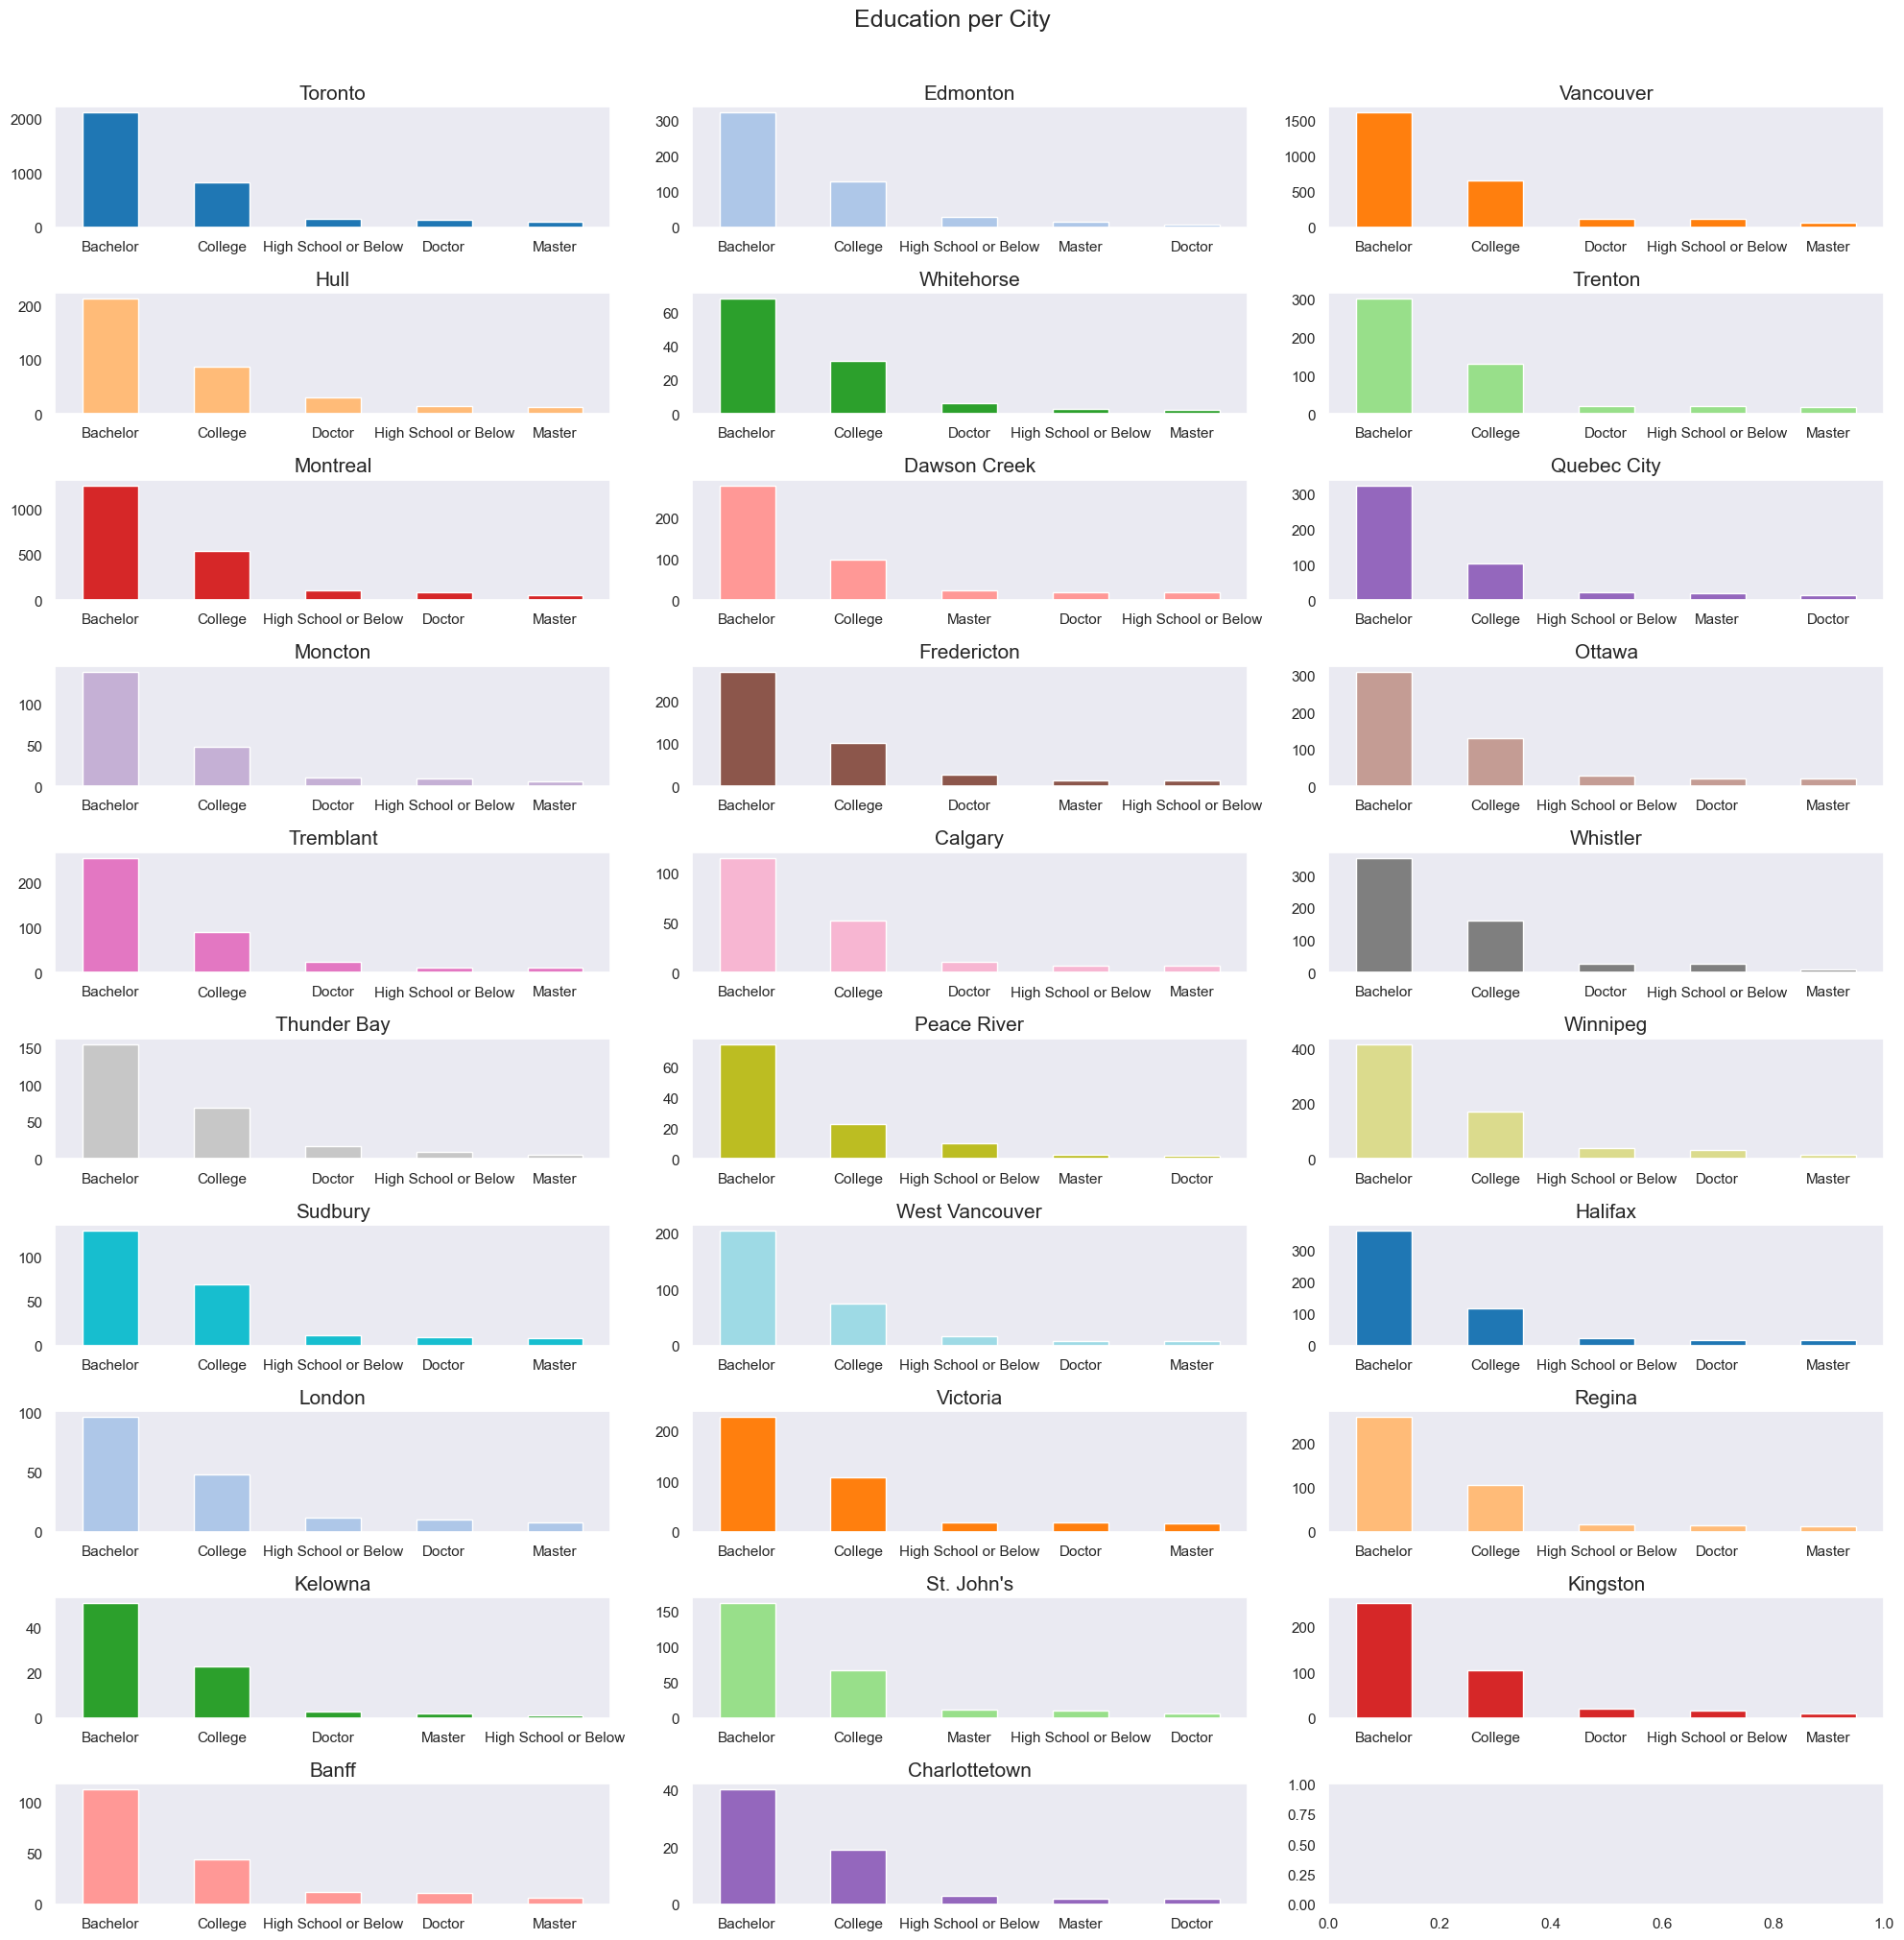

In [20]:
plot_categories(customer_data, "Education", "City", 5, 20,20)

This column might be to delete, but in order to have full conviction of it, we need to acess this with the flights data already merged.

## "Province or State"

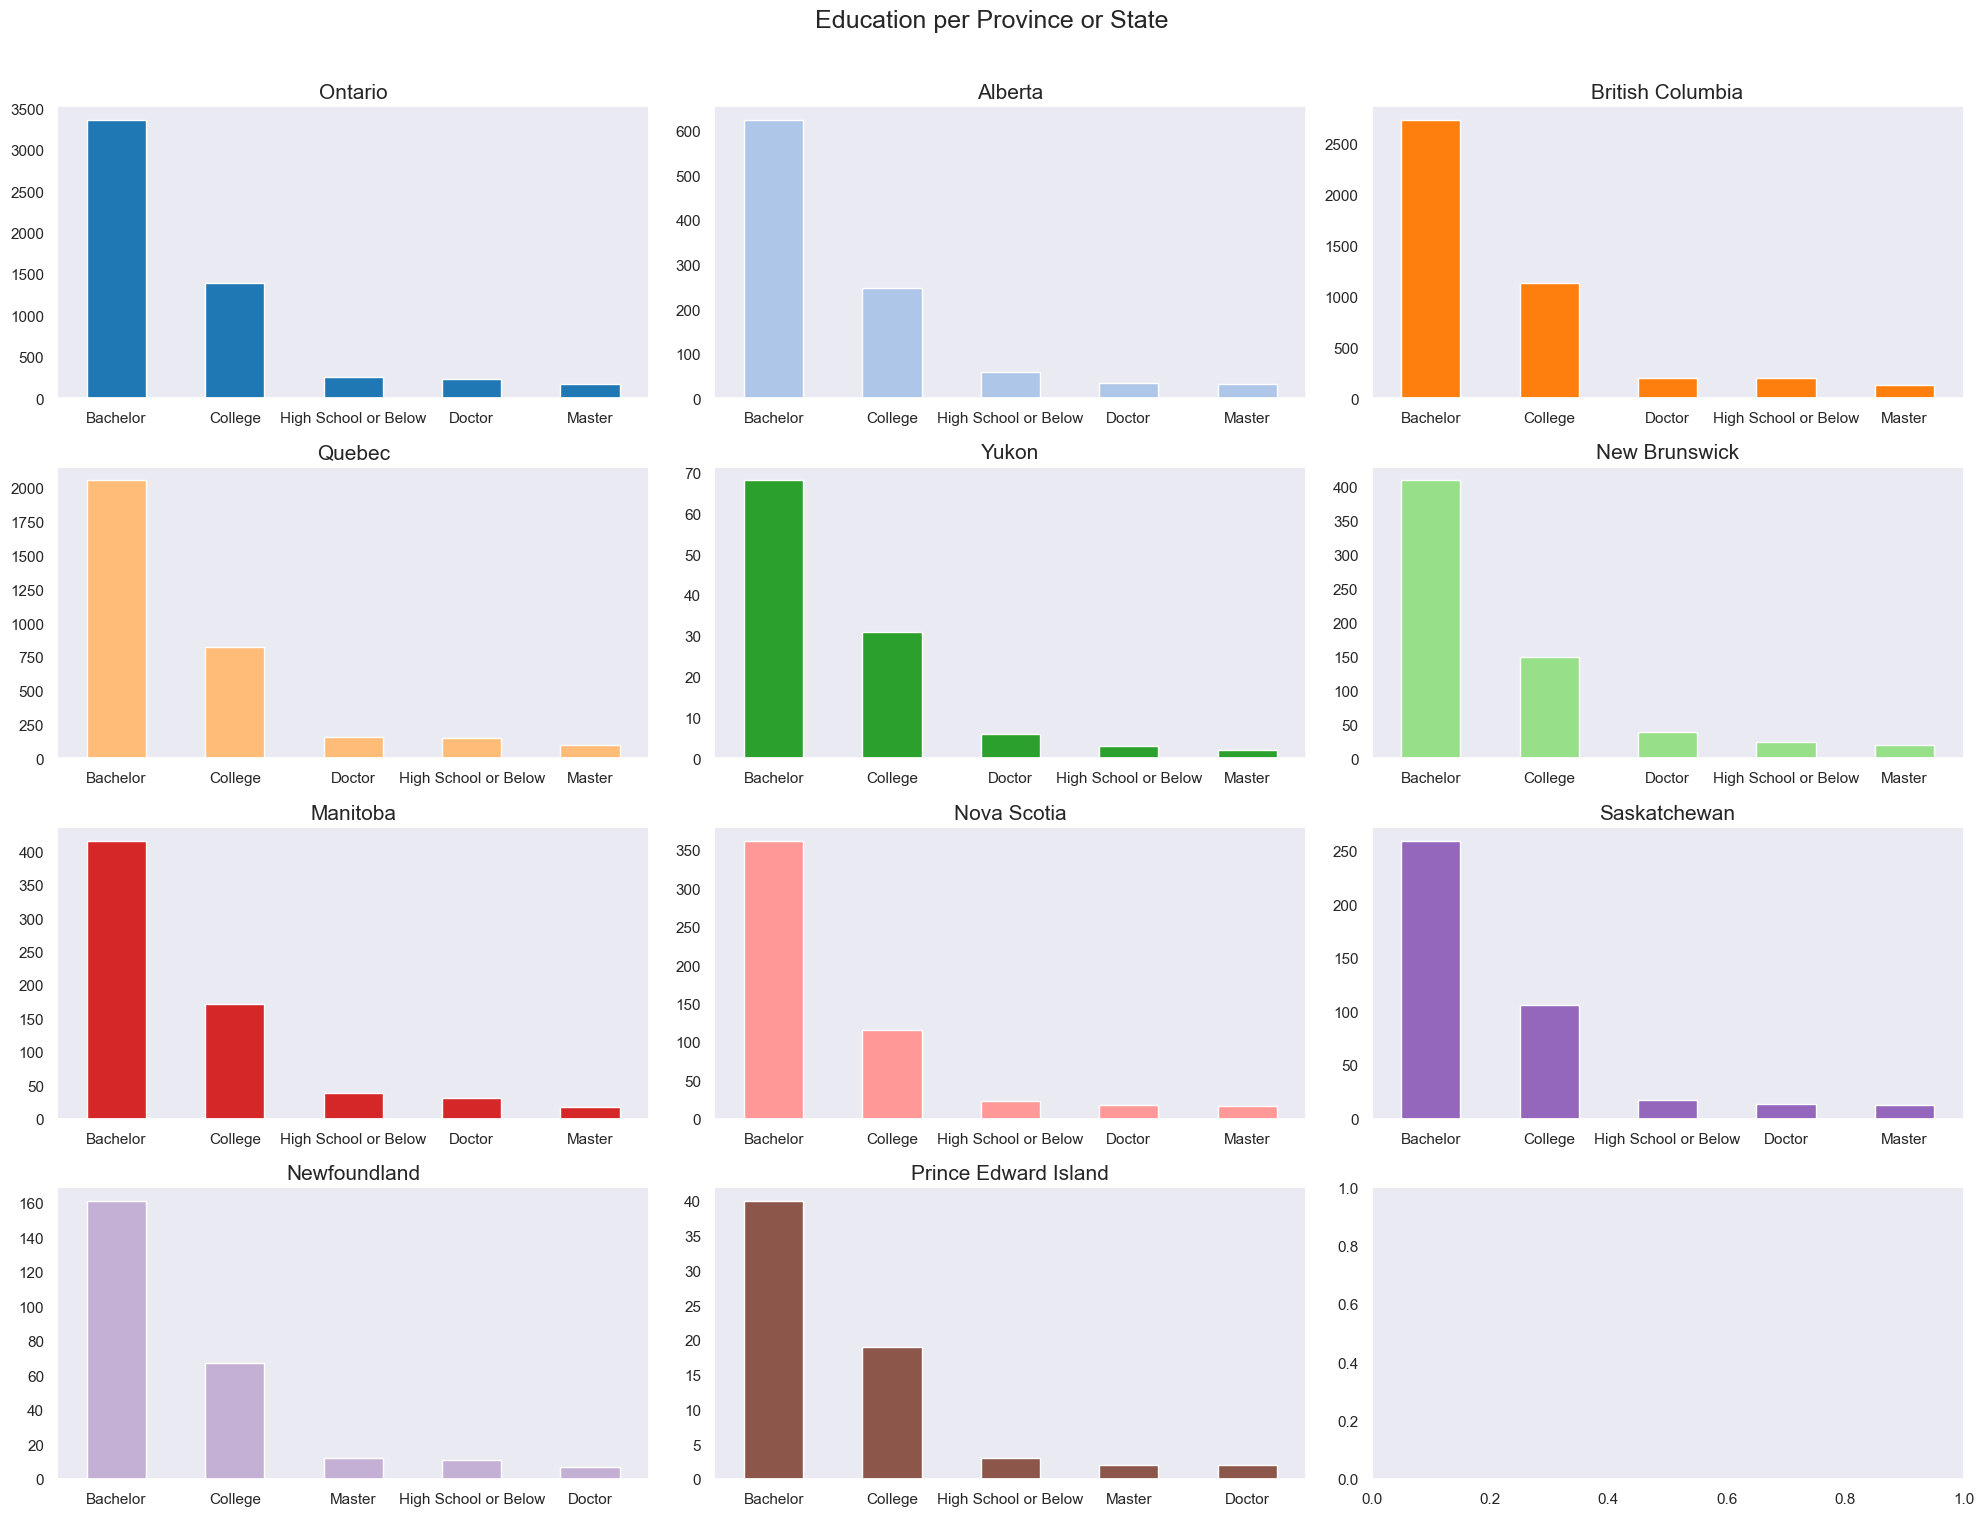

In [21]:
plot_categories(customer_data, "Education", "Province or State", 5, 20,15)

In "Province or State" the categorical variables seem to be equally distributed as well, to check if they give something relevant we'll need the flights data to confirm.

## Changing wrong Data Types

In [22]:
customer_data['EnrollmentDateOpening'] = pd.to_datetime(customer_data['EnrollmentDateOpening'], errors='coerce')
customer_data['CancellationDate'] = pd.to_datetime(customer_data['CancellationDate'], errors='coerce')
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16757 entries, 0 to 19
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Loyalty#                 16757 non-null  int64         
 1   Customer Name            16757 non-null  object        
 2   Province or State        16757 non-null  object        
 3   City                     16757 non-null  object        
 4   Latitude                 16757 non-null  float64       
 5   Longitude                16757 non-null  float64       
 6   Gender                   16757 non-null  object        
 7   Education                16757 non-null  object        
 8   Location Code            16757 non-null  object        
 9   Income                   16737 non-null  float64       
 10  Marital Status           16757 non-null  object        
 11  LoyaltyStatus            16757 non-null  object        
 12  EnrollmentDateOpening    16757 non-null 

## Chencking for Possible Data Inconsistencies

Probably most data incosistencies will be found out when both datasets are merged.

## Feature Engeneering

### "rejoined_program"

In [25]:
customer_data[(customer_data["EnrollmentDateOpening"] > customer_data["CancellationDate"])|(customer_data["EnrollmentDateOpening"] == 2021)]

Loyalty#        Customer Name Province or State       City   Latitude  \
72       357549         Elisha Furna  British Columbia   Whistler  50.116322   
77       265297         Ebonie Radde          Manitoba   Winnipeg  49.895138   
176      845613       Jerald Shiring            Quebec   Montreal  45.501690   
210      830547         Dortha Detar  British Columbia  Vancouver  49.282730   
304      514900        Edith Forslin           Ontario    Toronto  43.653225   
...         ...                  ...               ...        ...        ...   
16514    584796  Julieann Mclaughlan  British Columbia  Vancouver  49.282730   
16522    774931          Cira Defide  British Columbia   Whistler  50.116322   
16551    275807      Arturo Michaeli          Manitoba   Winnipeg  49.895138   
16634    433307   Lyndon Vogelgesang          Manitoba   Winnipeg  49.895138   
16757    893127         Bernie Morea  British Columbia  Vancouver  49.282730   

        Longitude  Gender Education Location Code   Income Marital Status  \
72    -122.957360  female  Bachelor         Rural  60817.0         Single   
77     -97.138374  female  Bachelor         Urban  39101.0        Married   
176    -73.567253    male  Bachelor         Urban  30598.0        Married   
210   -123.120740    male  Bachelor         Rural  26245.0         Single   
304    -79.383186  female  Bachelor         Urban  80892.0        Married   
...           ...     ...       ...           ...      ...            ...   
16514 -123.120740    male  Bachelor         Rural  59853.0         Single   
16522 -122.957360  female  Bachelor         Rural  33588.0        Married   
16551  -97.138374  female  Bachelor         Urban  71467.0       Divorced   
16634  -97.138374    male  Bachelor      Suburban  80540.0        Married   
16757 -123.120740  female  Bachelor         Urban  33806.0       Divorced   

      LoyaltyStatus EnrollmentDateOpening CancellationDate  \
72             Star            2021-09-21       2019-05-21   
77             Star            2021-07-17       2019-03-17   
176            Star            2021-10-13       2019-06-13   
210            Star            2021-05-11       2019-01-11   
304            Star            2021-07-20       2019-03-20   
...             ...                   ...              ...   
16514          Star            2021-08-18       2019-04-18   
16522          Star            2021-07-21       2019-03-21   
16551          Star            2021-10-18       2019-06-18   
16634          Star            2021-08-03       2019-04-03   
16757          Star            2021-08-20       2019-04-20   

       Customer Lifetime Value EnrollmentType  
72                     3964.73       Standard  
77                     3978.67       Standard  
176                    4198.03       Standard  
210                    4271.20       Standard  
304                    4425.91       Standard  
...                        ...            ...  
16514                 19454.41       Standard  
16522                 19731.34       Standard  
16551                 20446.60       Standard  
16634                 22758.91       Standard  
16757                 27789.69       Standard  

[201 rows x 16 columns]

In [26]:
customer_data["EnrollmentType"].unique()

array(['Standard', '2021 Promotion'], dtype=object)

These seem to be customers that rejoined the comnpany, so we can create a variable that assigns if this happened.

In [62]:
customer_data["rejoined_program"] = np.where(
    customer_data["EnrollmentDateOpening"] > customer_data["CancellationDate"], 1, 0)

As average customer lifetime span is a variable from customer lifetime value, we'll create the variable time_in_program.

### "Days_in_program"

In [63]:
print(customer_data["EnrollmentDateOpening"].sort_values(ascending=False).reset_index(drop=True)[0])
print(customer_data["CancellationDate"].sort_values(ascending=False).reset_index(drop=True)[0])

2021-12-30 00:00:00
2021-12-30 00:00:00


We'll use the "2021-12-30" date as a timestamp, cause it's the last date we have access in this dataset.

In [64]:
reference_date = pd.Timestamp("2021-12-30")

#Defining the new variable
customer_data["Days_in_prog"] = np.where(
    customer_data["CancellationDate"].isna(),
    (reference_date - customer_data["EnrollmentDateOpening"]).dt.days,
    (customer_data["CancellationDate"] - customer_data["EnrollmentDateOpening"]).dt.days
)
#Cleaning up a special case where cancelation date is before the enrollment date

mask = customer_data["CancellationDate"] < customer_data["EnrollmentDateOpening"]

customer_data.loc[mask, "Days_in_prog"] = (
    reference_date - customer_data.loc[mask, "EnrollmentDateOpening"]
).dt.days


### "Cancelled_program"

We'll create a variable that tells us if the client has left the loyalty program or not.

In [65]:
customer_data["Cancelled_program"] = np.where(customer_data["CancellationDate"] > customer_data["EnrollmentDateOpening"], 1, 0)

In [66]:
customer_data

Loyalty#        Customer Name Province or State          City   Latitude  \
0     480934  Cecilia Householder           Ontario       Toronto  43.653225   
1     549612          Dayle Menez           Alberta      Edmonton  53.544388   
2     429460        Necole Hannon  British Columbia     Vancouver  49.282730   
3     608370          Queen Hagee           Ontario       Toronto  43.653225   
4     530508       Claire Latting            Quebec          Hull  45.428730   
..       ...                  ...               ...           ...        ...   
15    100012       Ethan Thompson            Quebec   Quebec City  46.759733   
16    100013          Layla Young           Alberta      Edmonton  53.524829   
17    100014       Amelia Bennett     New Brunswick       Moncton  46.051866   
18    100015      Benjamin Wilson            Quebec   Quebec City  46.862970   
19    100016          Emma Martin  British Columbia  Dawson Creek  55.720562   

     Longitude  Gender Education Location Code   Income Marital Status  \
0   -79.383186  female  Bachelor         Urban  70146.0        Married   
1  -113.490930    male   College         Rural      0.0       Divorced   
2  -123.120740    male   College         Urban      0.0         Single   
3   -79.383186    male   College      Suburban      0.0         Single   
4   -75.713364    male  Bachelor      Suburban  97832.0        Married   
..         ...     ...       ...           ...      ...            ...   
15  -71.141009    male  Bachelor      Suburban      NaN         Single   
16 -113.546357  female  Bachelor         Rural      NaN        Married   
17  -64.825428    male  Bachelor         Rural      NaN        Married   
18  -71.133444  female   College         Urban      NaN        Married   
19 -120.160090  female    Master      Suburban      NaN         Single   

   LoyaltyStatus EnrollmentDateOpening CancellationDate  \
0           Star            2019-02-15              NaT   
1           Star            2019-03-09              NaT   
2           Star            2017-07-14       2021-01-08   
3           Star            2016-02-17              NaT   
4           Star            2017-10-25              NaT   
..           ...                   ...              ...   
15          Star            2019-02-27       2019-02-27   
16          Star            2017-09-20       2017-09-20   
17          Star            2020-11-28       2020-11-28   
18          Star            2020-04-09       2020-04-09   
19          Star            2020-07-21       2020-07-21   

    Customer Lifetime Value  EnrollmentType  rejoined_program  Days_in_prog  \
0                   3839.14        Standard                 0        1049.0   
1                   3839.61        Standard                 0        1027.0   
2                   3839.75        Standard                 0        1274.0   
3                   3839.75        Standard                 0        2143.0   
4                   3842.79  2021 Promotion                 0        1527.0   
..                      ...             ...               ...           ...   
15                      NaN        Standard                 0           0.0   
16                      NaN        Standard                 0           0.0   
17                      NaN        Standard                 0           0.0   
18                      NaN        Standard                 0           0.0   
19                      NaN        Standard                 0           0.0   

    Cancelled_program  
0                   0  
1                   0  
2                   1  
3                   0  
4                   0  
..                ...  
15                  0  
16                  0  
17                  0  
18                  0  
19                  0  

[16757 rows x 19 columns]

# GeoData

In [67]:
# Create a new DataFrame with selected columns from customer_info
customer_location = customer_data.loc[:, ['Loyalty#', 'Customer Name', 'Latitude', 'Longitude']].copy()

# Display the customer_location DataFrame
customer_location

Loyalty#        Customer Name   Latitude   Longitude
0     480934  Cecilia Householder  43.653225  -79.383186
1     549612          Dayle Menez  53.544388 -113.490930
2     429460        Necole Hannon  49.282730 -123.120740
3     608370          Queen Hagee  43.653225  -79.383186
4     530508       Claire Latting  45.428730  -75.713364
..       ...                  ...        ...         ...
15    100012       Ethan Thompson  46.759733  -71.141009
16    100013          Layla Young  53.524829 -113.546357
17    100014       Amelia Bennett  46.051866  -64.825428
18    100015      Benjamin Wilson  46.862970  -71.133444
19    100016          Emma Martin  55.720562 -120.160090

[16757 rows x 4 columns]

In [68]:
# Set the Mapbox access token
px.set_mapbox_access_token('pk.eyJ1IjoiYXJjYWRldGUyMSIsImEiOiJjbGY5cXlkY3oxcnp1NDBvNHNyM3MwZm9mIn0.sN_CBzeTj04J0BRjr3DJyw')

# Create a scatter mapbox plot using the customer_location DataFrame
fig = px.scatter_mapbox(customer_location, 
                        lat = 'Latitude', 
                        lon = 'Longitude', 
                        hover_name = 'Customer Name', 
                        color_discrete_sequence = ['green', 'silver'],
                        zoom = 10, 
                        height = 500,
                        width = 800,
                        opacity = 0.1
                        )

# Customize the layout of the figure
fig.update_layout(mapbox_style = 'dark', 
                  margin = {'r': 0, 't': 0, 'l': 0, 'b': 0},
                  legend_title_text = 'Group', 
                  legend_title_font_color = 'black',
                  legend_orientation = 'h', 
                  legend_y = 0
                  )

# Display the figure
fig.show()

In [69]:
# Set the Mapbox access token
px.set_mapbox_access_token('pk.eyJ1IjoiYXJjYWRldGUyMSIsImEiOiJjbGY5cXlkY3oxcnp1NDBvNHNyM3MwZm9mIn0.sN_CBzeTj04J0BRjr3DJyw')

# Create a scatter mapbox plot using the customer_location DataFrame
fig = px.scatter_mapbox(customer_location, 
                        lat = 'Latitude', 
                        lon = 'Longitude', 
                        hover_name = 'Customer Name', 
                        color_discrete_sequence = ['green', 'silver'],
                        zoom = 10, 
                        height = 500,
                        width = 800,
                        opacity = 0.1
                        )

# Customize the layout of the figure
fig.update_layout(mapbox_style = 'dark', 
                  margin = {'r': 0, 't': 0, 'l': 0, 'b': 0},
                  legend_title_text = 'Group', 
                  legend_title_font_color = 'black',
                  legend_orientation = 'h', 
                  legend_y = 0
                  )

# Display the figure
fig.show()

We will try now to create a region category that will insert a customer based on their location, to retrieve a better insight instead of having a discrete latitude/longitude data. We will try to keep the amount of clusters to minimal, in order to minimize the dimensionality, when inputting our data into the training model.

Our first strategy will be to try to cluster our customers based on 6-8 clusters using KMeans

In [70]:
# Select the data you want to cluster (Latitude and Longitude)
X = customer_location[['Latitude', 'Longitude']]

# Create a KMeans model and specify you want 5 clusters
# We use random_state=42 to make the results reproducible
kmeans = KMeans(n_clusters=8, random_state=42, n_init=50)

# Fit the model to your data and get the cluster labels
customer_location['Cluster'] = kmeans.fit_predict(X)

# Convert the cluster labels (which are numbers 0-4) to strings
# This makes Plotly treat them as categories for coloring
customer_location['Cluster'] = customer_location['Cluster'].astype(str)

# Display the DataFrame with the new 'Cluster' column
print(customer_location.head())

   Loyalty#        Customer Name   Latitude   Longitude Cluster
0    480934  Cecilia Householder  43.653225  -79.383186       1
1    549612          Dayle Menez  53.544388 -113.490930       5
2    429460        Necole Hannon  49.282730 -123.120740       2
3    608370          Queen Hagee  43.653225  -79.383186       1
4    530508       Claire Latting  45.428730  -75.713364       4


In [71]:
# Set the Mapbox access token (as you did before)
px.set_mapbox_access_token('pk.eyJ1IjoiYXJjYWRldGUyMSIsImEiOiJjbGY5cXlkY3oxcnp1NDBvNHNyM3MwZm9mIn0.sN_CBzeTj04J0BRjr3DJyw')

# Create the scatter mapbox plot
fig = px.scatter_mapbox(customer_location, 
                        lat='Latitude', 
                        lon='Longitude', 
                        hover_name='Customer Name', 
                        color='Cluster',  # <-- This is the key change!
                        zoom=3,           # <-- Zoomed out to see all of Canada
                        height=500,
                        width=800,
                        opacity=0.8       # <-- Increased opacity to see colors
                       )

# Customize the layout
fig.update_layout(mapbox_style='dark', 
                  margin={'r': 0, 't': 0, 'l': 0, 'b': 0},
                  legend_title_text='Customer Cluster', # <-- Updated title
                  legend_orientation='h', 
                  legend_y=0
                 )

# Display the figure
fig.show()

Even though the results look promising, we feel like the clusters could be better organized. We will try a different strategy based on density (DBScan)

In [72]:
# Copy the DataFrame for this new method
customer_density = customer_location.loc[:, ['Customer Name', 'Latitude', 'Longitude']].copy()

# Get the coordinates for clustering
X = customer_density[['Latitude', 'Longitude']]

db = DBSCAN(eps=4.6, min_samples=5)
clusters = db.fit_predict(X)

customer_density['Cluster'] = clusters

print(customer_density['Cluster'].value_counts())

Cluster
0    9676
1    4819
5     674
3     555
6     409
7     258
4     256
2     110
Name: count, dtype: int64


In [73]:
# Convert cluster numbers to strings for Plotly
customer_density['Cluster'] = customer_density['Cluster'].astype(str)

# Rename the '-1' cluster to 'Outlier (Noise)' for a clearer legend
customer_density['Cluster'] = customer_density['Cluster'].replace('-1', 'Outlier (Noise)')

# Set the Mapbox access token
px.set_mapbox_access_token('pk.eyJ1IjoiYXJjYWRldGUyMSIsImEiOiJjbGY5cXlkY3oxcnp1NDBvNHNyM3MwZm9mIn0.sN_CBzeTj04J0BRjr3DJyw')

# Create the scatter mapbox plot
fig = px.scatter_mapbox(customer_density, 
                        lat='Latitude', 
                        lon='Longitude', 
                        hover_name='Customer Name', 
                        color='Cluster',  # Color by the new density clusters
                        zoom=3,           # Zoom out to see all of Canada
                        height=500,
                        width=800,
                        opacity=0.8
                       )

# Customize the layout
fig.update_layout(mapbox_style='dark', 
                  margin={'r': 0, 't': 0, 'l': 0, 'b': 0},
                  legend_title_text='Density Cluster',
                  legend_orientation='h', 
                  legend_y=0
                 )

# Display the figure
fig.show()

After analyzing the results, we have concluded that the best clustering method here presented will be the KMeans, after looking at the DBScan´s clustering options.

In [74]:
df_clean = pd.merge(
    customer_data,
    customer_location,
    on=['Loyalty#', 'Customer Name', 'Latitude', 'Longitude'],
    how='left'
)

In [75]:
df_clean.head(3)

Loyalty#        Customer Name Province or State       City   Latitude  \
0    480934  Cecilia Householder           Ontario    Toronto  43.653225   
1    549612          Dayle Menez           Alberta   Edmonton  53.544388   
2    429460        Necole Hannon  British Columbia  Vancouver  49.282730   

    Longitude  Gender Education Location Code   Income Marital Status  \
0  -79.383186  female  Bachelor         Urban  70146.0        Married   
1 -113.490930    male   College         Rural      0.0       Divorced   
2 -123.120740    male   College         Urban      0.0         Single   

  LoyaltyStatus EnrollmentDateOpening CancellationDate  \
0          Star            2019-02-15              NaT   
1          Star            2019-03-09              NaT   
2          Star            2017-07-14       2021-01-08   

   Customer Lifetime Value EnrollmentType  rejoined_program  Days_in_prog  \
0                  3839.14       Standard                 0        1049.0   
1                  3839.61       Standard                 0        1027.0   
2                  3839.75       Standard                 0        1274.0   

   Cancelled_program Cluster  
0                  0       1  
1                  0       5  
2                  1       2

# Univariate Distributions

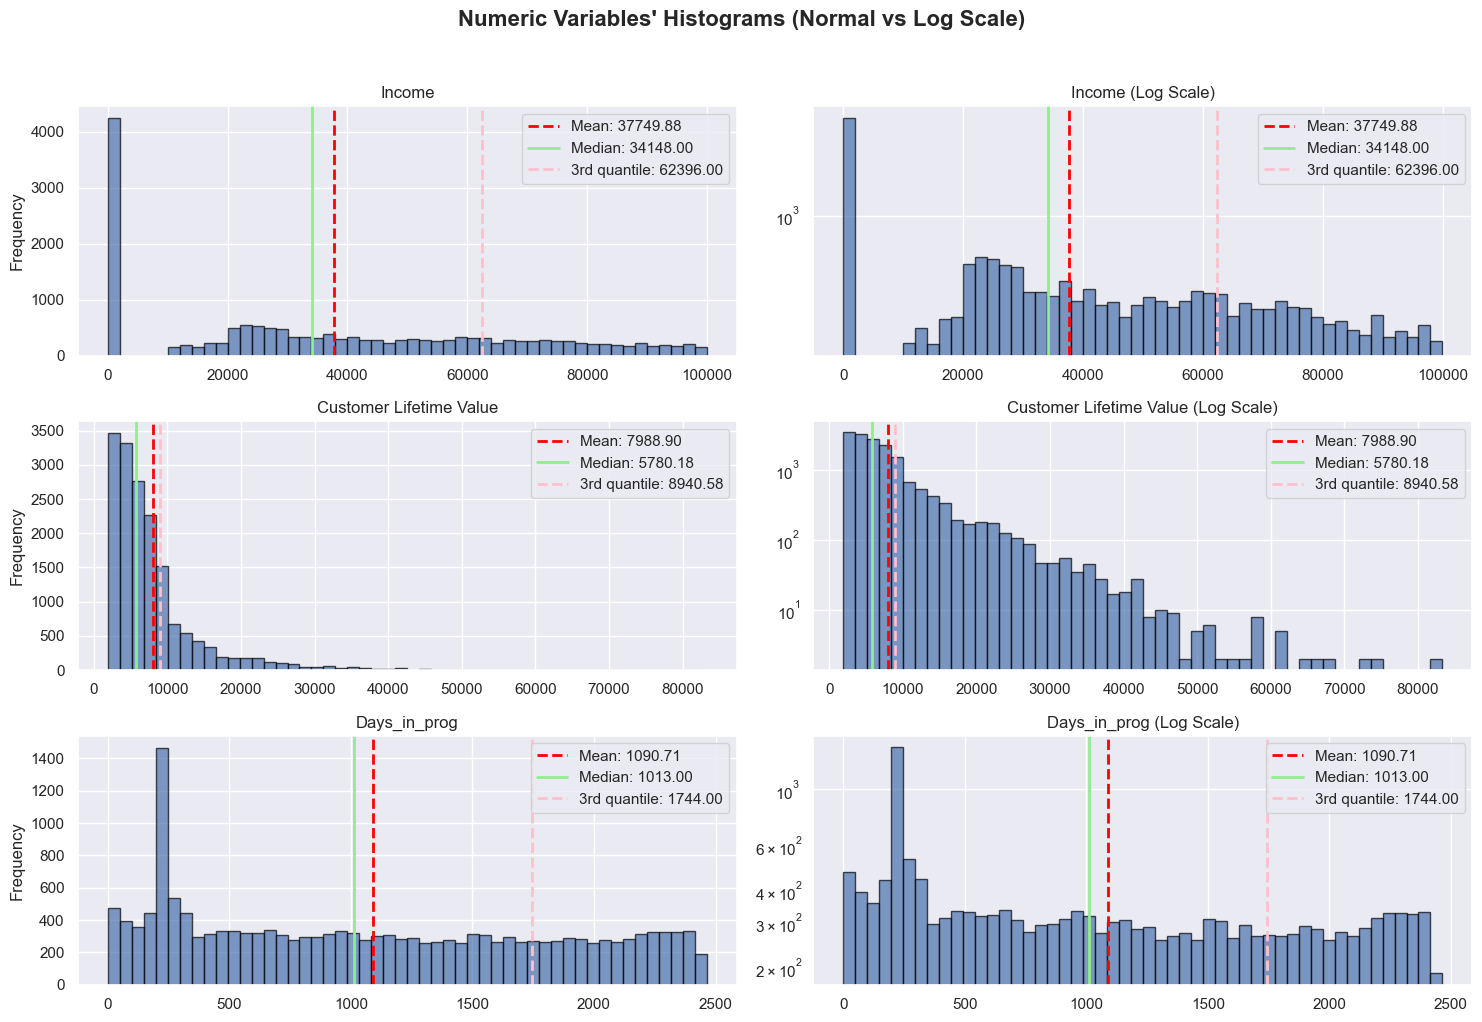

In [76]:
# Plot ALL Numeric Variables' Histograms in one figure
sns.set(style= "darkgrid")

metric_features = customer_data.select_dtypes(include=np.number).drop(["Loyalty#", "rejoined_program", "Cancelled_program", "Latitude", "Longitude"], axis=1)

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

# Loop through each feature
for i, feat in enumerate(metric_features):

    # Calculate mean and median
    mean_val = customer_data[feat].mean()
    median_val = customer_data[feat].median()
    third_quantile = customer_data[feat].quantile(0.75)
    
    # Left plot: normal histogram
    axes[i, 0].hist(customer_data[feat], bins = 50, edgecolor= "black", alpha = 0.7)
    axes[i, 0].set_title(f"{feat}")
    axes[i, 0].set_ylabel("Frequency")
    axes[i, 0].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i, 0].axvline(median_val, color='lightgreen', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[i, 0].axvline(third_quantile, color='pink', linestyle='--', linewidth=2, label=f'3rd quantile: {third_quantile:.2f}')
    axes[i, 0].legend()

    # Right plot: log-scale histogram
    axes[i, 1].hist(customer_data[feat], bins= 50, log = True, edgecolor= "black", alpha = 0.7)
    axes[i, 1].set_title(f"{feat} (Log Scale)")
    axes[i, 1].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i, 1].axvline(median_val, color='lightgreen', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[i, 1].axvline(third_quantile, color='pink', linestyle='--', linewidth=2, label=f'3rd quantile: {third_quantile:.2f}')
    axes[i, 1].legend()

# Adjust layout and add overall title
fig.suptitle("Numeric Variables' Histograms (Normal vs Log Scale)", fontsize=16, y=1.02, fontweight='bold')
plt.tight_layout()
plt.show()

- "Income": The most common value is 0 by far, which is influentiating the mean for a lot, so it would be interesting to visualize this graph again, but without the zero's values.

- "Customer Lifetime Value": Is a right skewed graph, where most data lays down bellow 9 thousand, but still having some really high values, above 20 thousand and even above 40 thousand.

- "Days_in_prog": Seems to be equally distributed, even with the quantiles been evenly distributed, but witha. big spike around 250 days, which points do recent costumers. Probably has to do with the 2021 promotion.

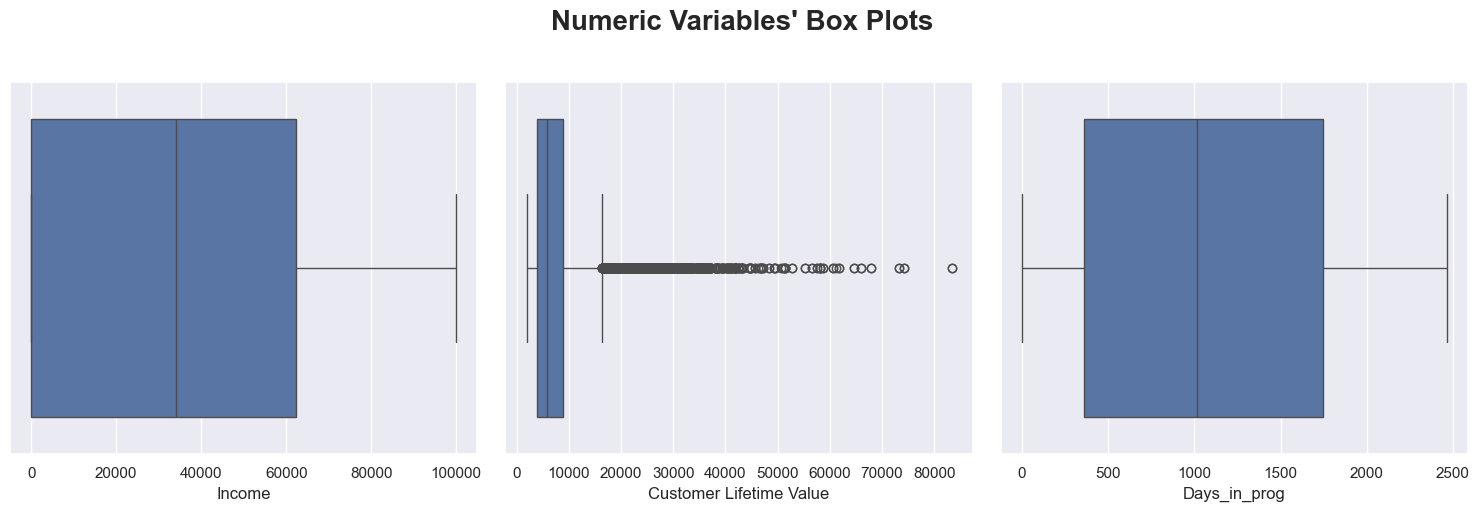

In [77]:
# Plot ALL Numeric Variables' Histograms in one figure

sns.set(style= "darkgrid", context= "notebook") ## Reset to darkgrid

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(1, 3, figsize=(15, 5),tight_layout=True)

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=customer_data[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
plt.suptitle("Numeric Variables' Box Plots", fontsize=20, y=1.02, fontweight='bold')
plt.show()

- "Income": as seen before, is mostly equally distributed, but has that big spike at 0 that influenciates a lot the graph.

- "Customer Lifetime Value": A really right skewed variable, as the boxplot confirms, having a lot of severe outliers, that still can be really useful for the company.

- "Days_in_prog": This boxplot just tells us that wen have more customers that joined the program less than 1000 days ago than more than 1000 days ago.

### Zero Income Customers

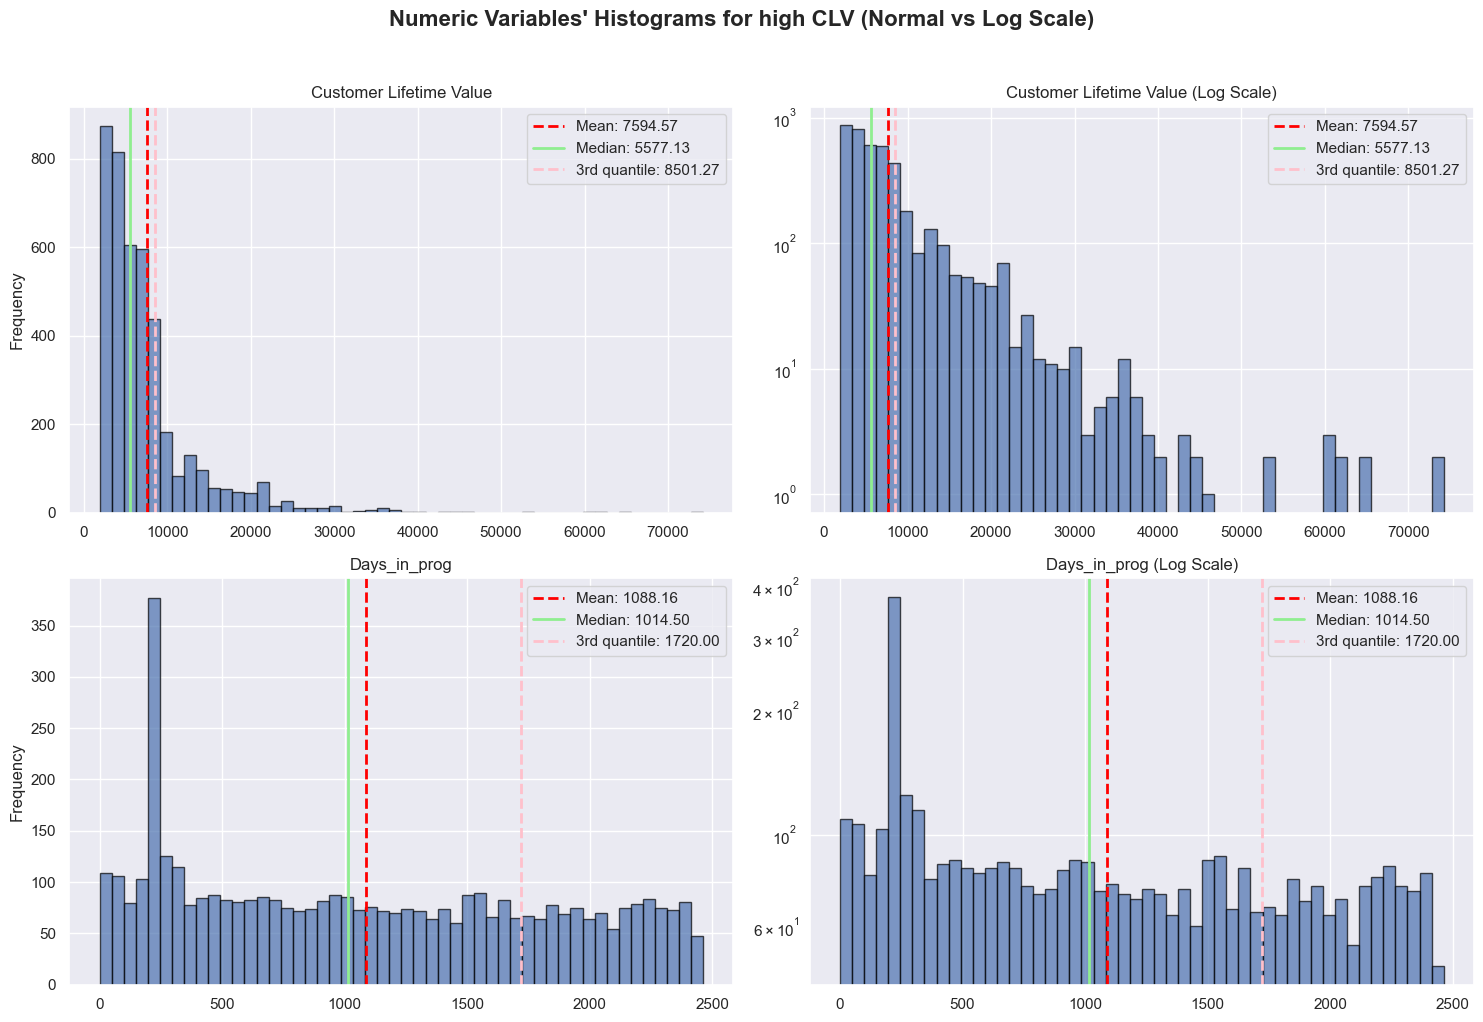

In [78]:
zero_inc_cust = customer_data[customer_data["Income"] == 0]

# Plot ALL Numeric Variables' Histograms in one figure
sns.set(style= "darkgrid")

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Loop through each feature
for i, feat in enumerate(metric_features.drop("Income", axis=1)):

    # Calculate mean and median
    mean_val = zero_inc_cust[feat].mean()
    median_val = zero_inc_cust[feat].median()
    third_quantile = zero_inc_cust[feat].quantile(0.75)
    
    # Left plot: normal histogram
    axes[i, 0].hist(zero_inc_cust[feat], bins = 50, edgecolor= "black", alpha = 0.7)
    axes[i, 0].set_title(f"{feat}")
    axes[i, 0].set_ylabel("Frequency")
    axes[i, 0].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i, 0].axvline(median_val, color='lightgreen', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[i, 0].axvline(third_quantile, color='pink', linestyle='--', linewidth=2, label=f'3rd quantile: {third_quantile:.2f}')
    axes[i, 0].legend()

    # Right plot: log-scale histogram
    axes[i, 1].hist(zero_inc_cust[feat], bins= 50, log = True, edgecolor= "black", alpha = 0.7)
    axes[i, 1].set_title(f"{feat} (Log Scale)")
    axes[i, 1].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i, 1].axvline(median_val, color='lightgreen', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[i, 1].axvline(third_quantile, color='pink', linestyle='--', linewidth=2, label=f'3rd quantile: {third_quantile:.2f}')
    axes[i, 1].legend()

# Adjust layout and add overall title
fig.suptitle("Numeric Variables' Histograms for high CLV (Normal vs Log Scale)", fontsize=16, y=1.02, fontweight='bold')
plt.tight_layout()
plt.show()

Insights:

- There are no major differences between the customers with zero of income, compared with the ones with incomes above 0.

### High Customer Lifetime Value customers

There are 1764 customers with CLV above 15k.


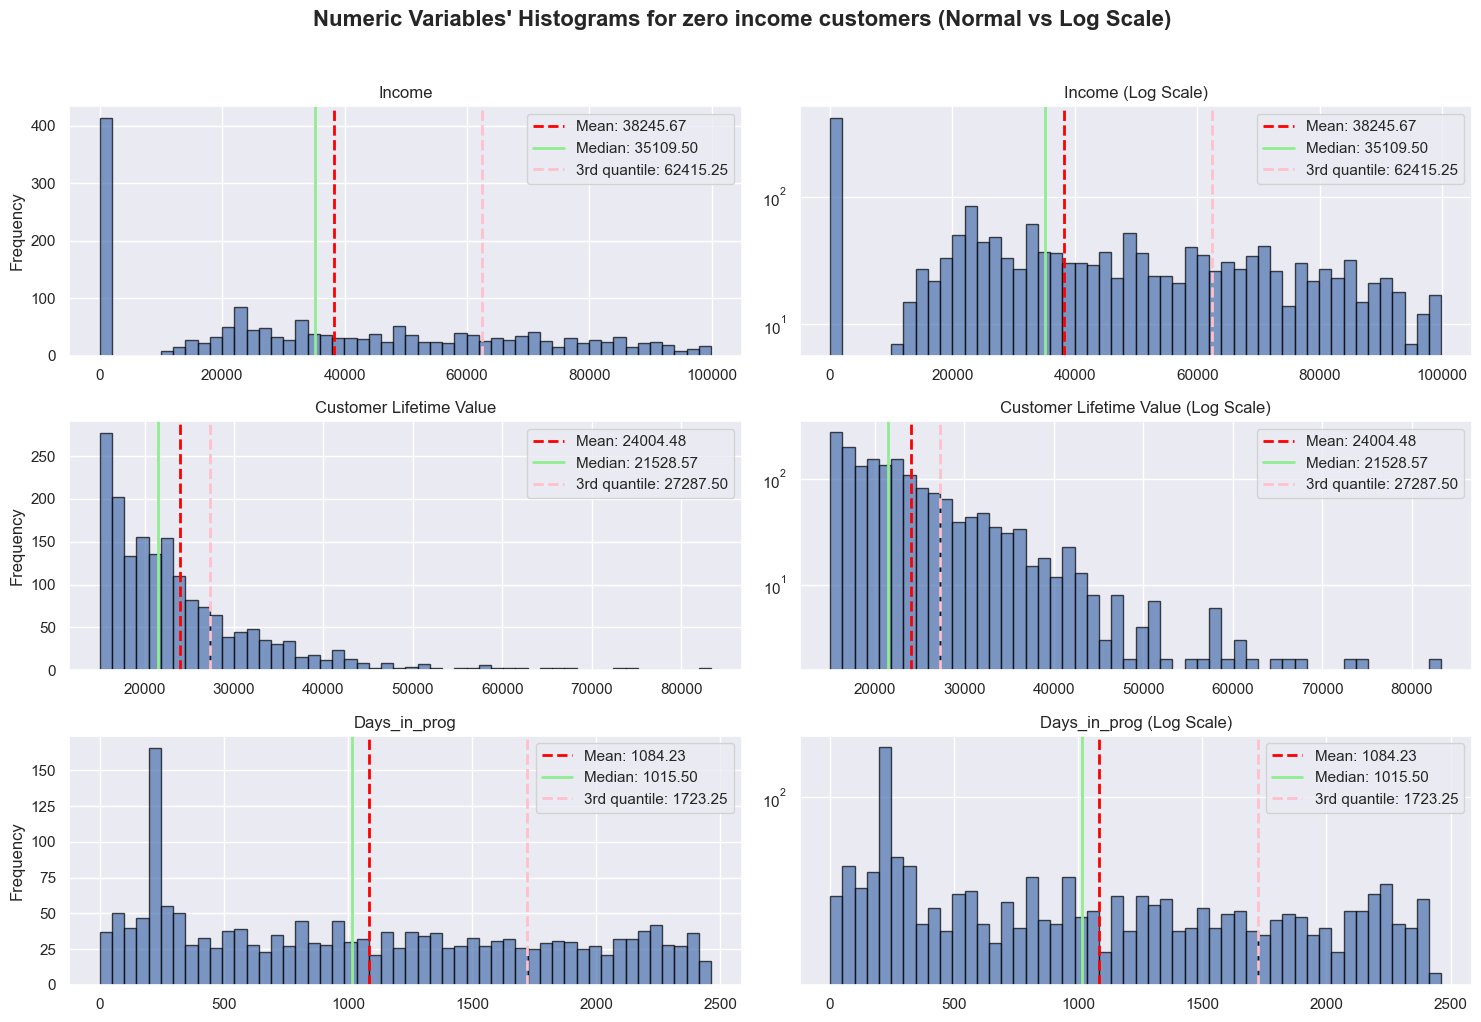

In [79]:
high_CLV_cust = customer_data[customer_data["Customer Lifetime Value"] > 15000]

print(f"There are {len(high_CLV_cust)} customers with CLV above 15k.")

# Plot ALL Numeric Variables' Histograms in one figure
sns.set(style= "darkgrid")

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

# Loop through each feature
for i, feat in enumerate(metric_features):

    # Calculate mean and median
    mean_val = high_CLV_cust[feat].mean()
    median_val = high_CLV_cust[feat].median()
    third_quantile = high_CLV_cust[feat].quantile(0.75)
    
    # Left plot: normal histogram
    axes[i, 0].hist(high_CLV_cust[feat], bins = 50, edgecolor= "black", alpha = 0.7)
    axes[i, 0].set_title(f"{feat}")
    axes[i, 0].set_ylabel("Frequency")
    axes[i, 0].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i, 0].axvline(median_val, color='lightgreen', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[i, 0].axvline(third_quantile, color='pink', linestyle='--', linewidth=2, label=f'3rd quantile: {third_quantile:.2f}')
    axes[i, 0].legend()

    # Right plot: log-scale histogram
    axes[i, 1].hist(high_CLV_cust[feat], bins= 50, log = True, edgecolor= "black", alpha = 0.7)
    axes[i, 1].set_title(f"{feat} (Log Scale)")
    axes[i, 1].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i, 1].axvline(median_val, color='lightgreen', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[i, 1].axvline(third_quantile, color='pink', linestyle='--', linewidth=2, label=f'3rd quantile: {third_quantile:.2f}')
    axes[i, 1].legend()

# Adjust layout and add overall title
fig.suptitle("Numeric Variables' Histograms for zero income customers (Normal vs Log Scale)", fontsize=16, y=1.02, fontweight='bold')
plt.tight_layout()
plt.show()

Insights:

- They seem to have similar distributions compared to the whole dataset. We should take a look afterwards with the whole dataset gathered.

### 2021 promotion customers

Maybe these customers have lowers incomes.

There are 1143 customers that joined the program in the 2021 promotion.


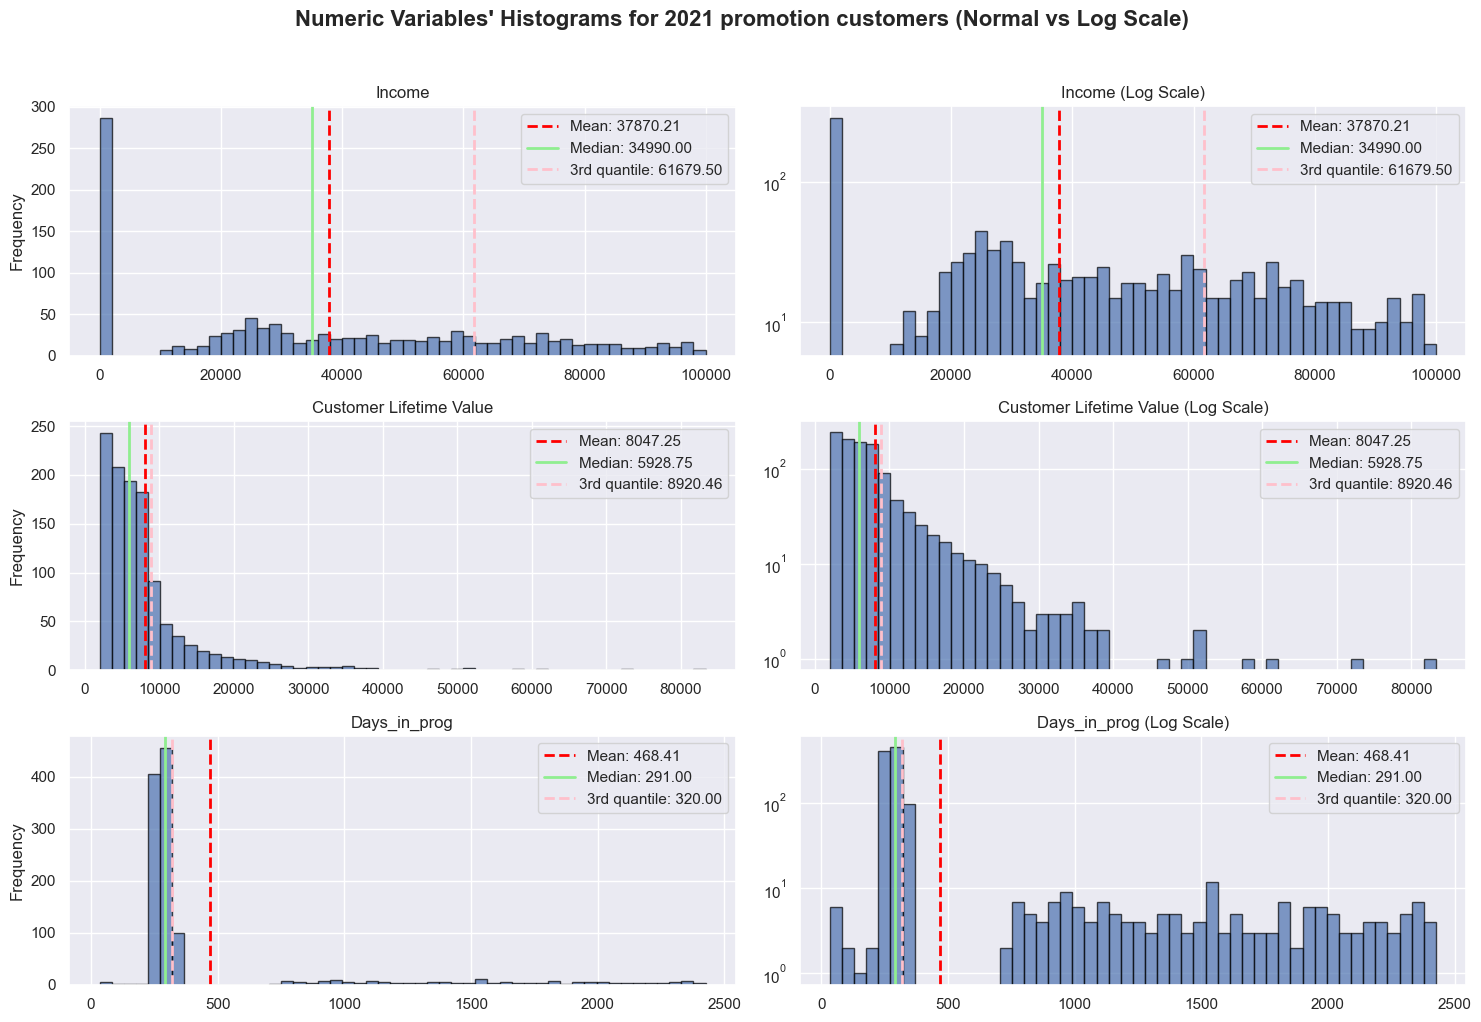

In [80]:
customers_2021_promo = customer_data[customer_data["EnrollmentType"] == "2021 Promotion"]

print(f"There are {len(customers_2021_promo)} customers that joined the program in the 2021 promotion.")

# Plot ALL Numeric Variables' Histograms in one figure
sns.set(style= "darkgrid")

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

# Loop through each feature
for i, feat in enumerate(metric_features):

    # Calculate mean and median
    mean_val = customers_2021_promo[feat].mean()
    median_val = customers_2021_promo[feat].median()
    third_quantile = customers_2021_promo[feat].quantile(0.75)
    
    # Left plot: normal histogram
    axes[i, 0].hist(customers_2021_promo[feat], bins = 50, edgecolor= "black", alpha = 0.7)
    axes[i, 0].set_title(f"{feat}")
    axes[i, 0].set_ylabel("Frequency")
    axes[i, 0].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i, 0].axvline(median_val, color='lightgreen', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[i, 0].axvline(third_quantile, color='pink', linestyle='--', linewidth=2, label=f'3rd quantile: {third_quantile:.2f}')
    axes[i, 0].legend()

    # Right plot: log-scale histogram
    axes[i, 1].hist(customers_2021_promo[feat], bins= 50, log = True, edgecolor= "black", alpha = 0.7)
    axes[i, 1].set_title(f"{feat} (Log Scale)")
    axes[i, 1].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i, 1].axvline(median_val, color='lightgreen', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[i, 1].axvline(third_quantile, color='pink', linestyle='--', linewidth=2, label=f'3rd quantile: {third_quantile:.2f}')
    axes[i, 1].legend()

# Adjust layout and add overall title
fig.suptitle("Numeric Variables' Histograms for 2021 promotion customers (Normal vs Log Scale)", fontsize=16, y=1.02, fontweight='bold')
plt.tight_layout()
plt.show()

Insights:

- There are customers that joined the program in the promotion in 2021 that have an enrollment date before 2021. This is an invalidity in the data.

In [81]:
print(f"Number of customer that joined before 2021 and are in the 2021 promo: {len(customer_data[(customer_data['EnrollmentType'] == '2021 Promotion') & (customer_data['Days_in_prog'] > 365)])}")
customer_data[(customer_data["EnrollmentType"] == "2021 Promotion") & (customer_data["Days_in_prog"] > 365)]
# Customers that enrroled in 2021 promo but are in the program before 2021

Number of customer that joined before 2021 and are in the 2021 promo: 172


Loyalty#    Customer Name Province or State        City   Latitude  \
4        530508   Claire Latting            Quebec        Hull  45.428730   
67       329382   Ngoc Dubuisson            Quebec    Montreal  45.501690   
231      557500   Coral Precythe           Ontario     Toronto  43.653225   
353      655743    Elfrieda Hash            Quebec    Montreal  45.501690   
648      121935    Lesia Droesch             Yukon  Whitehorse  60.721188   
...         ...              ...               ...         ...        ...   
16610    270901   Ernestina Iida           Ontario    Kingston  44.231171   
16663    254372      Elnora Oats           Ontario     Toronto  43.653225   
16687    502670     Bella Bluett            Quebec    Montreal  45.501690   
16790    959793  Darrin Dierking           Ontario     Toronto  43.653225   
16846    376299     Leandro Ripp           Ontario     Trenton  44.101128   

        Longitude  Gender             Education Location Code   Income  \
4      -75.713364    male              Bachelor      Suburban  97832.0   
67     -73.567253    male               College      Suburban      0.0   
231    -79.383186  female              Bachelor         Urban  24188.0   
353    -73.567253  female  High School or Below         Urban  20284.0   
648   -135.056840  female                Doctor      Suburban  29950.0   
...           ...     ...                   ...           ...      ...   
16610  -76.485954  female               College         Urban      0.0   
16663  -79.383186    male              Bachelor         Urban  84365.0   
16687  -73.567253    male               College         Urban      0.0   
16790  -79.383186    male              Bachelor      Suburban  68906.0   
16846  -77.576309  female               College         Urban      0.0   

      Marital Status LoyaltyStatus EnrollmentDateOpening CancellationDate  \
4            Married          Star            2017-10-25              NaT   
67            Single          Star            2015-08-27              NaT   
231          Married          Star            2018-11-04              NaT   
353           Single          Star            2016-07-24              NaT   
648          Married          Star            2018-10-19              NaT   
...              ...           ...                   ...              ...   
16610         Single          Star            2016-09-16              NaT   
16663        Married          Star            2018-07-14              NaT   
16687        Married          Star            2019-02-08              NaT   
16790        Married          Star            2018-02-25              NaT   
16846        Married          Star            2017-01-12              NaT   

       Customer Lifetime Value  EnrollmentType  rejoined_program  \
4                      3842.79  2021 Promotion                 0   
67                     3961.59  2021 Promotion                 0   
231                    4305.81  2021 Promotion                 0   
353                    4505.85  2021 Promotion                 0   
648                    4878.83  2021 Promotion                 0   
...                        ...             ...               ...   
16610                 22315.06  2021 Promotion                 0   
16663                 23981.54  2021 Promotion                 0   
16687                 24552.87  2021 Promotion                 0   
16790                 30118.66  2021 Promotion                 0   
16846                 35013.54  2021 Promotion                 0   

       Days_in_prog  Cancelled_program  
4            1527.0                  0  
67           2317.0                  0  
231          1152.0                  0  
353          1985.0                  0  
648          1168.0                  0  
...             ...                ...  
16610        1931.0                  0  
16663        1265.0                  0  
16687        1056.0                  0  
16790        1404.0                  0  


We can either:

- Check with the fligths data if they have flights before 2021 and see if it was a mistake and the year should be 2021.

- Change the enrollment type to standard.

- Delete them.

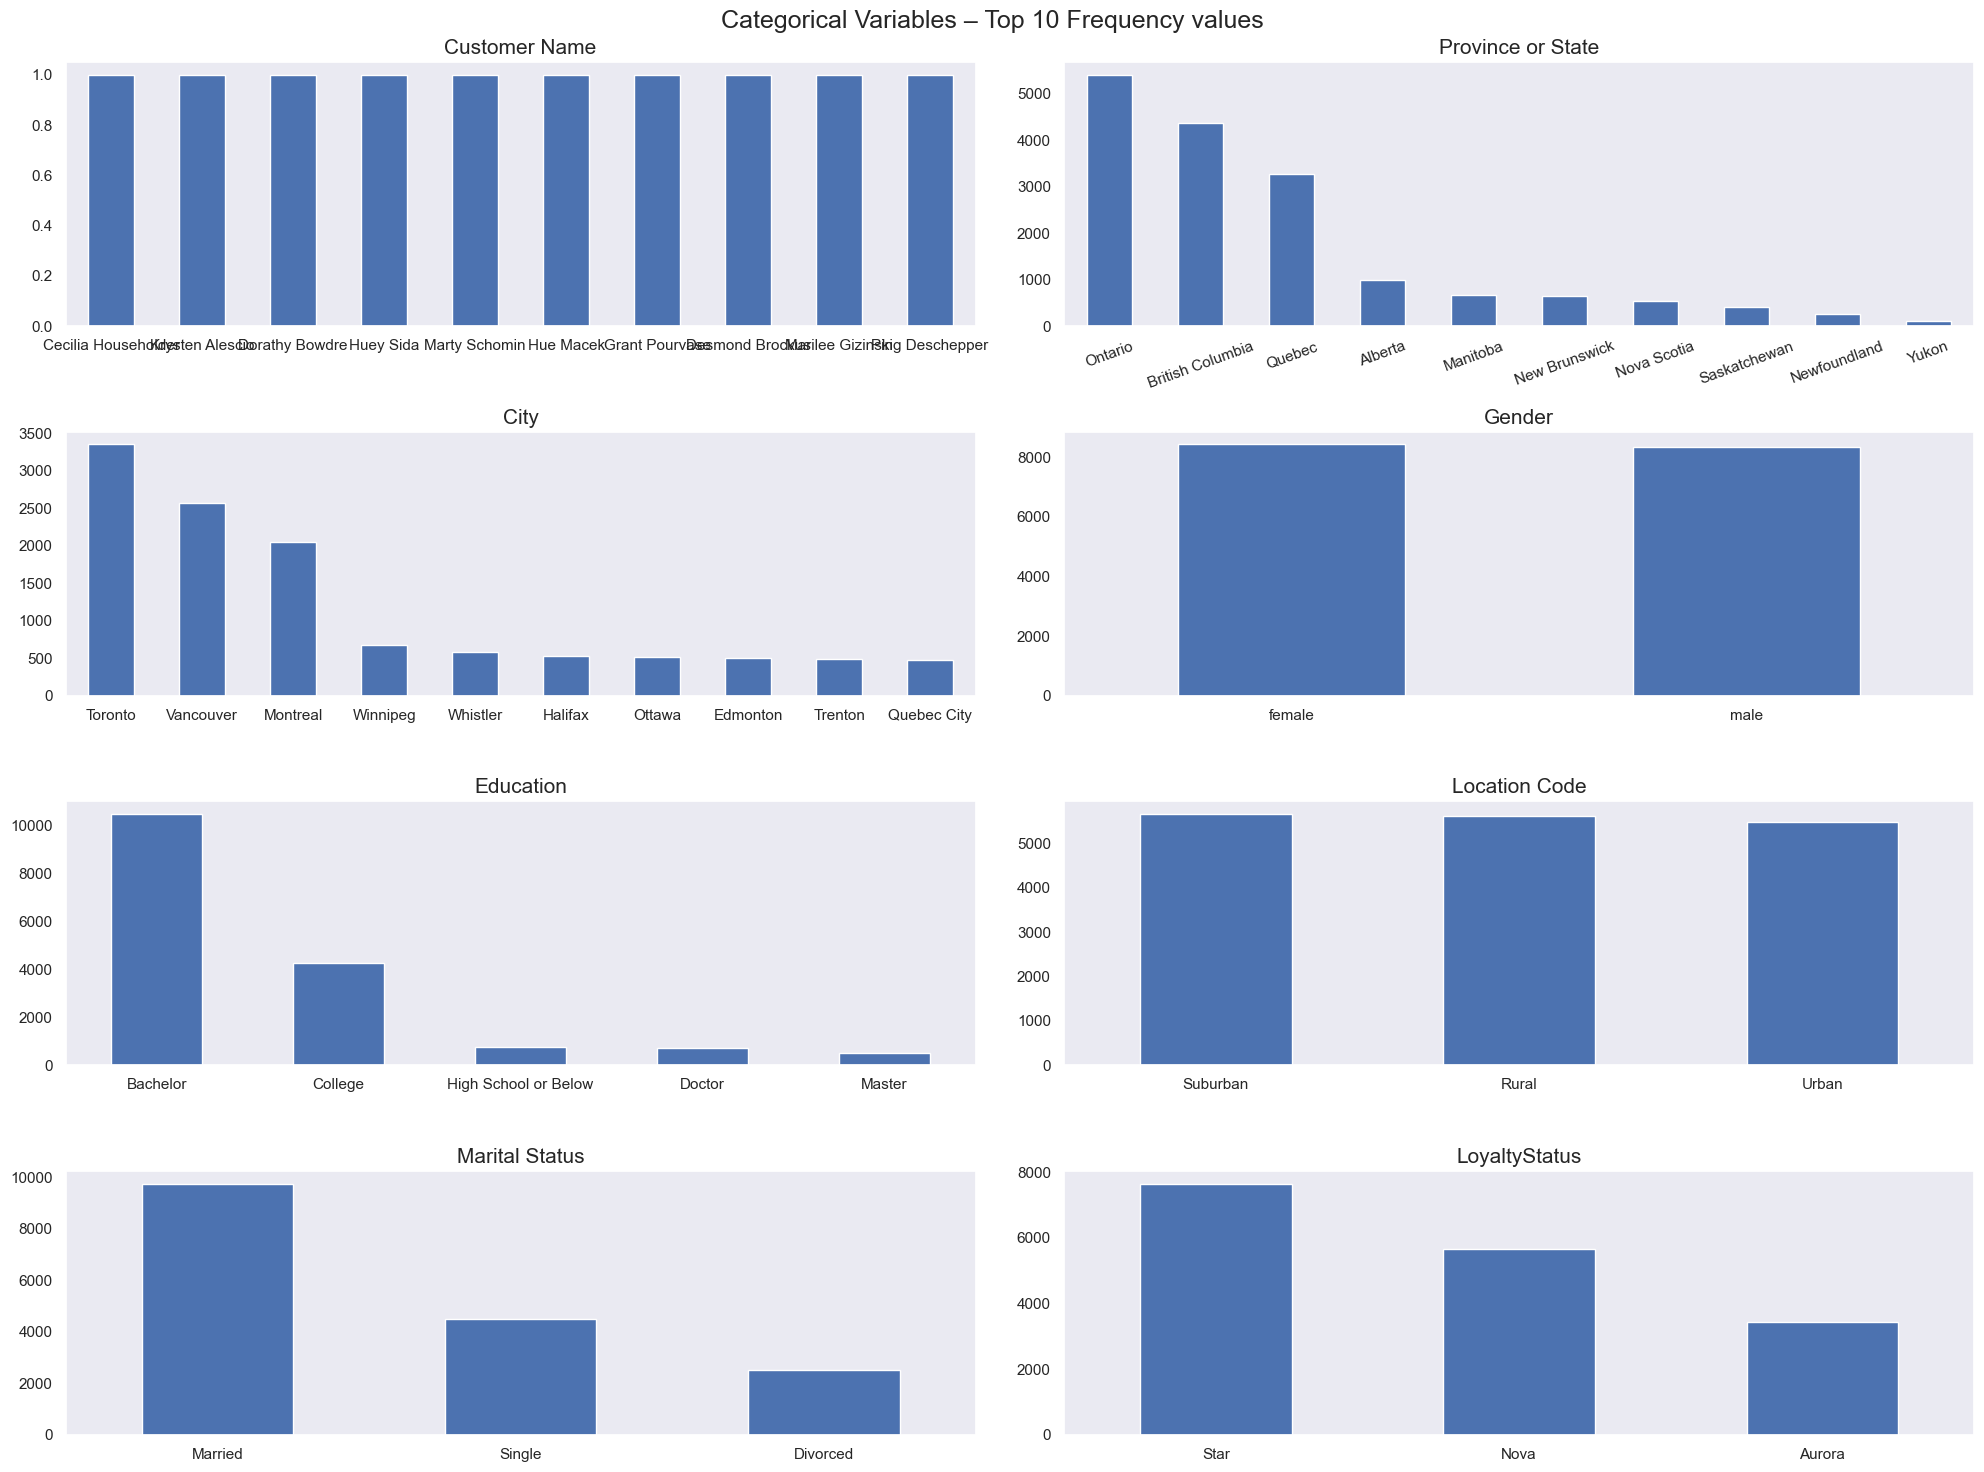

In [82]:
sns.set(style= "dark")

non_metric_features = customer_data.select_dtypes(exclude= np.number).drop(["EnrollmentDateOpening", "CancellationDate"], axis=1)

fig, axes = plt.subplots(4, 2, figsize=(20, 15))

for ax, feat in zip(axes.flatten(), non_metric_features):
    # use df_deps
    customer_data[feat].value_counts().head(10).plot(kind= "bar", ax=ax)
    ax.set_title(feat, fontsize = 15)

    if feat == "Province or State":
        ax.tick_params(axis="x", rotation=20)
    else:
        ax.tick_params(axis="x", rotation=0)
    
    ax.set_xlabel("")

plt.suptitle("Categorical Variables – Top 10 Frequency values", fontsize=18)
plt.tight_layout()

Insights:

- Most common province or state: "Ontario"

- Most Common City: "Toronto"
 
- In Education, Bachelor and College are by far the most common ones. 

- Married people seem to flight more.

- There is a small group of people that joined in the 2021 promotion, but it can contain interesting insights.

- Need to plot graphs to understand what "LoyaltyStatus" tells us.

# Bivariate Distributions

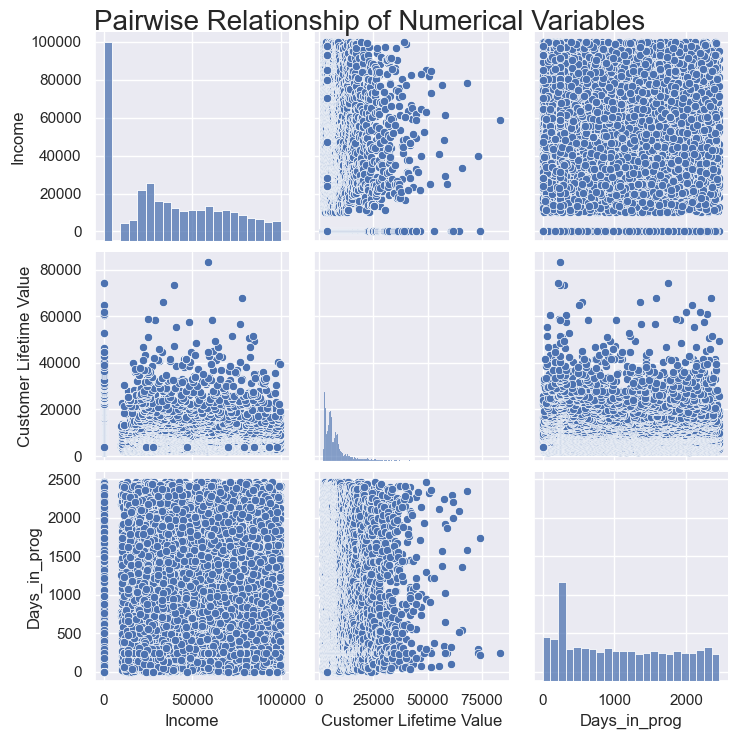

In [83]:
sns.set()

sns.pairplot(metric_features)

plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)
plt.show()


Interesting Insights:

- Through these graphs, we can see that the customers with income equal to zero have, on average, high customer lifetime values, which is really paradoxal. For this reason, we'll take a look at those customers in depth.

- The customer lifetime value doesn't seem to be correlated with the time the customers enrolled in the program.

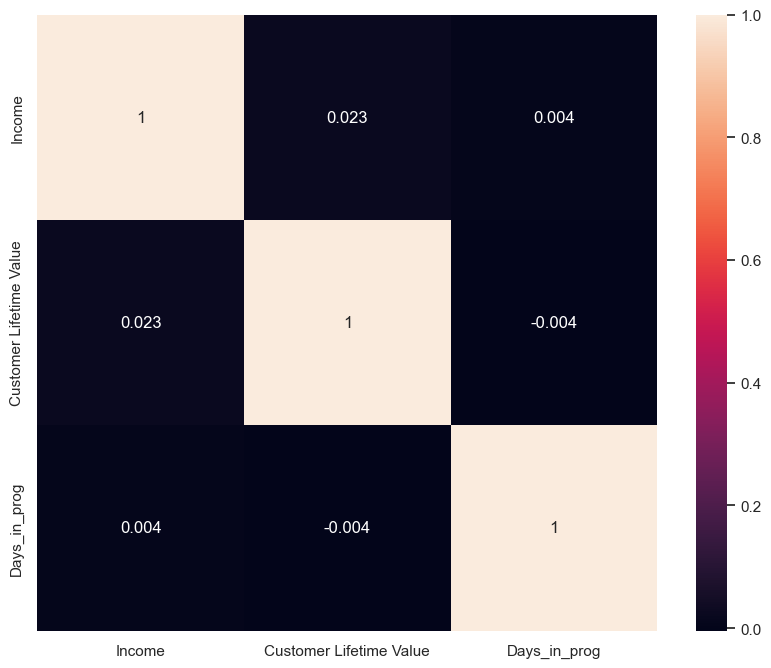

In [84]:
corr = metric_features.corr(method="pearson")

fig = plt.figure(figsize=(10, 8))

sns.heatmap(data=corr, annot=True, )

plt.show()


There is no relevant correlation between these variables.

Let's see if the education is relevant on our customers.

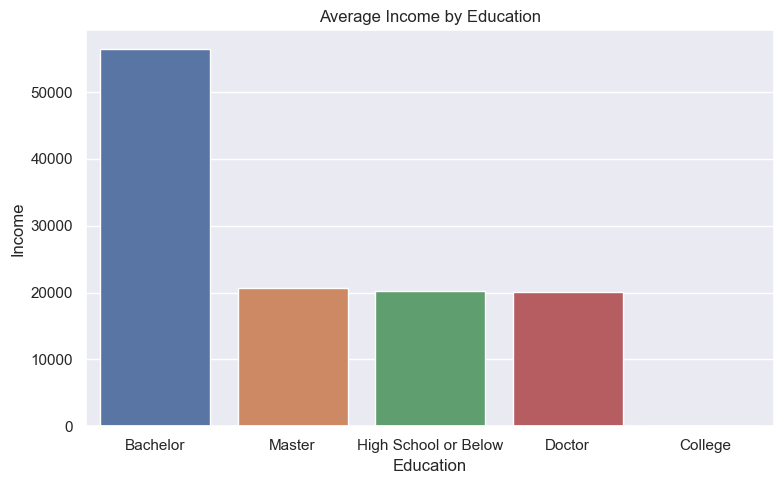

In [85]:
num_per_cat(customer_data, "Income", "Education")

Here we can confirm that the customers with the highest education level as the college are the ones with income zero, but they are at the same time, very important customers. This needs to be investigated.

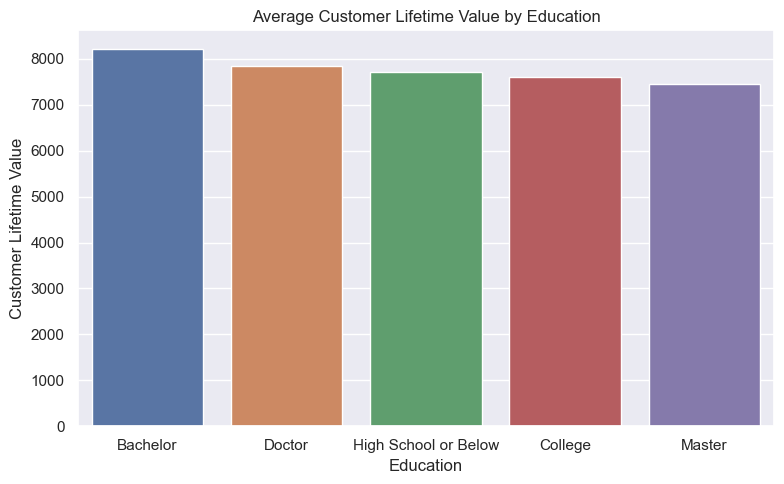

In [86]:
num_per_cat(customer_data, "Customer Lifetime Value", "Education")

Even with the difference in salaries between levels of education, the importance of the customers seems to be independent of the income, as we can see in this graph that the importance of the customers per level of education is roughly the same.

### "LoyaltyStatus"

As said before, we need to understand better what Loyalty status tells us.

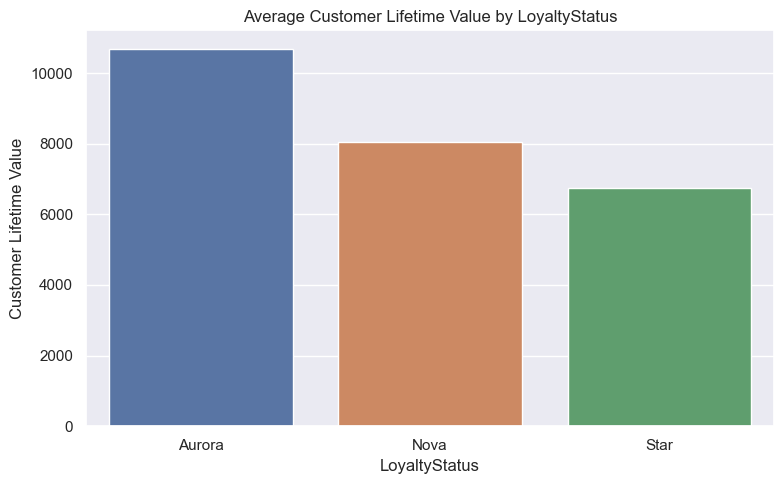

In [87]:
num_per_cat(customer_data, "Customer Lifetime Value", "LoyaltyStatus")

This category seems to differenciate the most valuable customers from the less valuable.

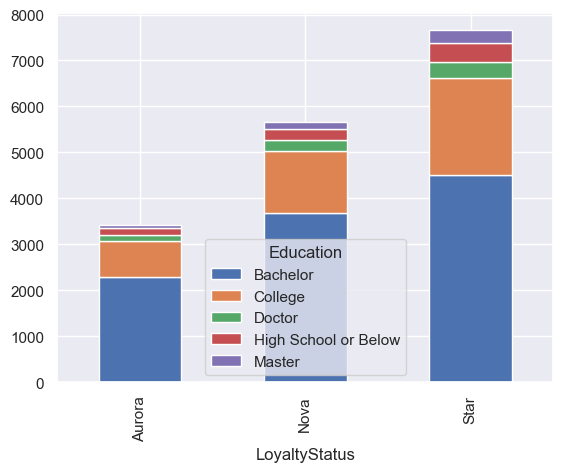

In [88]:
customer_data.groupby(["LoyaltyStatus", "Education"])["Education"].size().unstack().plot.bar(stacked=True)

plt.show()

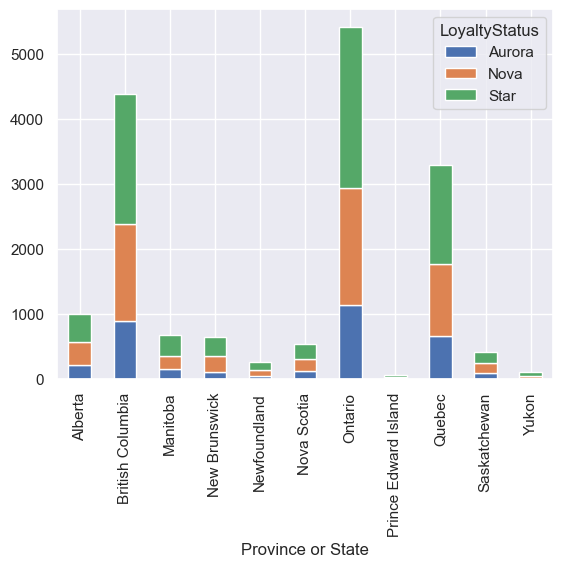

In [90]:
customer_data.groupby(["Province or State", "LoyaltyStatus"])["LoyaltyStatus"].size().unstack().plot.bar(stacked=True)

plt.show()

# 3. Flights Data

## 3.1 - Data Understanding

In [ ]:
flights_data.shape

(608436, 10)

In custoar data we have almost 17k entries.

In [ ]:
flights_data.head()

Loyalty#  Year  Month YearMonthDate  NumFlights  NumFlightsWithCompanions  \
0    413052  2021     12     12/1/2021         2.0                       2.0   
1    464105  2021     12     12/1/2021         0.0                       0.0   
2    681785  2021     12     12/1/2021        10.0                       3.0   
3    185013  2021     12     12/1/2021        16.0                       4.0   
4    216596  2021     12     12/1/2021         9.0                       0.0   

   DistanceKM  PointsAccumulated  PointsRedeemed  DollarCostPointsRedeemed  
0      9384.0              938.0             0.0                       0.0  
1         0.0                0.0             0.0                       0.0  
2     14745.0             1474.0             0.0                       0.0  
3     26311.0             2631.0          3213.0                      32.0  
4     19275.0             1927.0             0.0                       0.0

In [ ]:
flights_data.tail()

Loyalty#  Year  Month YearMonthDate  NumFlights  \
608431    999902  2019     12     12/1/2019         7.2   
608432    999911  2019     12     12/1/2019         0.0   
608433    999940  2019     12     12/1/2019        14.4   
608434    999982  2019     12     12/1/2019         0.0   
608435    999986  2019     12     12/1/2019         0.0   

        NumFlightsWithCompanions  DistanceKM  PointsAccumulated  \
608431                       0.0     30766.5            3076.65   
608432                       0.0         0.0               0.00   
608433                       0.9     18261.0            1826.10   
608434                       0.0         0.0               0.00   
608435                       0.0         0.0               0.00   

        PointsRedeemed  DollarCostPointsRedeemed  
608431             0.0                       0.0  
608432             0.0                       0.0  
608433             0.0                       0.0  
608434             0.0                       0.0  
608435             0.0                       0.0

In [ ]:
flights_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608436 entries, 0 to 608435
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loyalty#                  608436 non-null  int64  
 1   Year                      608436 non-null  int64  
 2   Month                     608436 non-null  int64  
 3   YearMonthDate             608436 non-null  object 
 4   NumFlights                608436 non-null  float64
 5   NumFlightsWithCompanions  608436 non-null  float64
 6   DistanceKM                608436 non-null  float64
 7   PointsAccumulated         608436 non-null  float64
 8   PointsRedeemed            608436 non-null  float64
 9   DollarCostPointsRedeemed  608436 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 46.4+ MB


All the dtypes seem to be accordingly, except to "EnrollmentDateOpening" and "CancellationDate" which should be a datetime data type.

In [ ]:
flights_data.describe(include= np.number).drop("Loyalty#", axis = 1)

Year          Month     NumFlights  NumFlightsWithCompanions  \
count  608436.000000  608436.000000  608436.000000             608436.000000   
mean     2020.000000       6.500000       3.908107                  0.983944   
std         0.816497       3.452055       5.057889                  2.003785   
min      2019.000000       1.000000       0.000000                  0.000000   
25%      2019.000000       3.750000       0.000000                  0.000000   
50%      2020.000000       6.500000       0.000000                  0.000000   
75%      2021.000000       9.250000       7.200000                  0.900000   
max      2021.000000      12.000000      21.000000                 11.000000   

          DistanceKM  PointsAccumulated  PointsRedeemed  \
count  608436.000000      608436.000000   608436.000000   
mean     7939.341419         793.777781      235.251678   
std     10260.421873        1025.918521      983.233374   
min         0.000000           0.000000        0.000000   
25%         0.000000           0.000000        0.000000   
50%       856.400000          85.275000        0.000000   
75%     15338.175000        1533.712500        0.000000   
max     42040.000000        4204.000000     7496.000000   

       DollarCostPointsRedeemed  
count             608436.000000  
mean                   2.324835  
std                    9.725168  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                    0.000000  
max                   74.000000

- The variance in "Income" variable is extremely high, specially due to the fact of the minimum being 0.

- "Customer Lifetime Value" seems to have a similar behaviour as "Income", probabluy because this two features might be very correlated.

In [ ]:
flights_data.describe(exclude= np.number)

YearMonthDate
count         608436
unique            36
top        12/1/2021
freq           16901

## 3.2. Data Cleaning


### Duplicates

In [ ]:
flights_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608436 entries, 0 to 608435
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loyalty#                  608436 non-null  int64  
 1   Year                      608436 non-null  int64  
 2   Month                     608436 non-null  int64  
 3   YearMonthDate             608436 non-null  object 
 4   NumFlights                608436 non-null  float64
 5   NumFlightsWithCompanions  608436 non-null  float64
 6   DistanceKM                608436 non-null  float64
 7   PointsAccumulated         608436 non-null  float64
 8   PointsRedeemed            608436 non-null  float64
 9   DollarCostPointsRedeemed  608436 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 46.4+ MB


In [ ]:
flights_data[flights_data['Loyalty#'] == 413052].head(2)

Loyalty#  Year  Month YearMonthDate  NumFlights  \
0       413052  2021     12     12/1/2021         2.0   
6628    413052  2020      6      6/1/2020         0.0   

      NumFlightsWithCompanions  DistanceKM  PointsAccumulated  PointsRedeemed  \
0                          2.0      9384.0              938.0             0.0   
6628                       0.0         0.0                0.0             0.0   

      DollarCostPointsRedeemed  
0                          0.0  
6628                       0.0

In [ ]:
dup_mask = flights_data.duplicated(subset=['Loyalty#', 'Year', 'Month'], keep=False)
print("Duplicate rows:", dup_mask.sum())

Duplicate rows: 11772


In [ ]:
flights_data[dup_mask].sort_values(['Loyalty#', 'Year', 'Month']).head(10)

Loyalty#  Year  Month YearMonthDate  NumFlights  \
405665    101902  2019      1      1/1/2019         0.0   
405666    101902  2019      1      1/1/2019         0.0   
422566    101902  2019      2      2/1/2019         0.0   
422567    101902  2019      2      2/1/2019         0.0   
439467    101902  2019      3      3/1/2019         0.0   
439468    101902  2019      3      3/1/2019         0.0   
456368    101902  2019      4      4/1/2019         3.6   
456369    101902  2019      4      4/1/2019         3.6   
473269    101902  2019      5      5/1/2019         8.1   
473270    101902  2019      5      5/1/2019         6.3   

        NumFlightsWithCompanions  DistanceKM  PointsAccumulated  \
405665                       0.0         0.0               0.00   
405666                       0.0         0.0               0.00   
422566                       0.0         0.0               0.00   
422567                       0.0         0.0               0.00   
439467                       0.0         0.0               0.00   
439468                       0.0         0.0               0.00   
456368                       0.0     10082.7            1008.27   
456369                       3.6     15718.5            1571.85   
473269                       2.7     16708.5            1670.85   
473270                       0.0     23946.3            2394.63   

        PointsRedeemed  DollarCostPointsRedeemed  
405665             0.0                       0.0  
405666             0.0                       0.0  
422566             0.0                       0.0  
422567             0.0                       0.0  
439467             0.0                       0.0  
439468             0.0                       0.0  
456368             0.0                       0.0  
456369          3536.1                      35.1  
473269             0.0                       0.0  
473270             0.0                       0.0

As we can observe, on the record 456369, which is linked to the month 04 of 2019, its duplicate, has different values on the rest of the variables. This could mean two things:

- If there are missing months/years on the records linked to this customer, this could translate to a system failure that has linked a prior transaction to the wrong month/year.
- If there is a perfect continuity on the records based on month/years, the system could have created two (2) records for the same period, and therefore we should aggreggate these values.

In [ ]:
flights_data['YearMonthDate'] = pd.to_datetime(flights_data['YearMonthDate'])
flights_data.head(2)

Loyalty#  Year  Month YearMonthDate  NumFlights  NumFlightsWithCompanions  \
0    413052  2021     12    2021-12-01         2.0                       2.0   
1    464105  2021     12    2021-12-01         0.0                       0.0   

   DistanceKM  PointsAccumulated  PointsRedeemed  DollarCostPointsRedeemed  
0      9384.0              938.0             0.0                       0.0  
1         0.0                0.0             0.0                       0.0

In [ ]:
# Create a DataFrame of expected months per Loyalty#
missing_counts = (
    flights_data
    .groupby('Loyalty#')['YearMonthDate']
    .apply(lambda x: (
        len(pd.date_range(x.min(), x.max(), freq='MS'))  # expected total months
        - len(x.drop_duplicates())                        # actual unique months recorded
    ))
    .reset_index(name='MissingMonths')
)

# Count how many have missing months
num_with_missing_months = (missing_counts['MissingMonths'] > 0).sum()
total_loyalties = missing_counts.shape[0]

print(f"Loyalty# with missing months: {num_with_missing_months} out of {total_loyalties}")

Loyalty# with missing months: 0 out of 16737


Since continuity is perfect:
- The duplication we´re seeing is almost certainly due to system-level duplication, e.g. multiple transaction records being summarized per month but not properly aggregated.
- Therefore, it’s safe to aggregate those duplicates by (Loyalty#, Year, Month) — summing the numeric fields like flights, distance, and points.

In [ ]:
df_flights_clean = (
    flights_data
    .groupby(['Loyalty#', 'Year', 'Month', 'YearMonthDate'], as_index=False)
    .agg({
        'NumFlights': 'sum',
        'NumFlightsWithCompanions': 'sum',
        'DistanceKM': 'sum',
        'PointsAccumulated': 'sum',
        'PointsRedeemed': 'sum',
        'DollarCostPointsRedeemed': 'sum'
    })
)

In [ ]:
print(f"Original rows: {len(flights_data)}")
print(f"After aggregation: {len(df_flights_clean)}")
print(f"Differnce: {len(flights_data) - len(df_flights_clean)}")

Original rows: 608436
After aggregation: 602532
Differnce: 5904


In [ ]:
dup_mask = df_flights_clean.duplicated(subset=['Loyalty#', 'Year', 'Month'], keep=False)
print("Duplicate rows:", dup_mask.sum())

Duplicate rows: 0


All the duplicated records have been fixed, without needing to delete around 6k rows of important data.

### Invalid Data 

In [ ]:
df_flights_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602532 entries, 0 to 602531
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Loyalty#                  602532 non-null  int64         
 1   Year                      602532 non-null  int64         
 2   Month                     602532 non-null  int64         
 3   YearMonthDate             602532 non-null  datetime64[ns]
 4   NumFlights                602532 non-null  float64       
 5   NumFlightsWithCompanions  602532 non-null  float64       
 6   DistanceKM                602532 non-null  float64       
 7   PointsAccumulated         602532 non-null  float64       
 8   PointsRedeemed            602532 non-null  float64       
 9   DollarCostPointsRedeemed  602532 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 46.0 MB


#### Negative Values

In [ ]:
columns_to_check = [
    'NumFlights', 
    'NumFlightsWithCompanions', 
    'DistanceKM', 
    'PointsAccumulated', 
    'PointsRedeemed', 
    'DollarCostPointsRedeemed'
]

for col in columns_to_check:
    neg_values = df_flights_clean[df_flights_clean[col] < 0]
    print(f"{col}: {len(neg_values)} negative values")


NumFlights: 0 negative values
NumFlightsWithCompanions: 0 negative values
DistanceKM: 0 negative values
PointsAccumulated: 0 negative values
PointsRedeemed: 0 negative values
DollarCostPointsRedeemed: 0 negative values


#### Invalid NrFlightCompanions > NrFlights

In [ ]:
invalid_companions = df_flights_clean[df_flights_clean['NumFlightsWithCompanions'] > df_flights_clean['NumFlights']]
print("Rows where NumFlightsWithCompanions > NumFlights:", len(invalid_companions))


Rows where NumFlightsWithCompanions > NumFlights: 0


#### Invalid Distance (Flights = 0 & Distance > 0)

In [ ]:
invalid_distance = df_flights_clean[(df_flights_clean['NumFlights'] == 0) & (df_flights_clean['DistanceKM'] > 0)]
print("Rows with distance > 0 but no flights:", len(invalid_distance))

invalid_distance

Rows with distance > 0 but no flights: 5858


Loyalty#  Year  Month YearMonthDate  NumFlights  \
313       100428  2021      2    2021-02-01         0.0   
315       100428  2021      4    2021-04-01         0.0   
540       100646  2019      1    2019-01-01         0.0   
552       100646  2020      1    2020-01-01         0.0   
568       100646  2021      5    2021-05-01         0.0   
...          ...   ...    ...           ...         ...   
602055    999513  2021      4    2021-04-01         0.0   
602125    999550  2021      2    2021-02-01         0.0   
602431    999940  2019      8    2019-08-01         0.0   
602443    999940  2020      8    2020-08-01         0.0   
602495    999982  2021     12    2021-12-01         0.0   

        NumFlightsWithCompanions  DistanceKM  PointsAccumulated  \
313                          0.0      4458.0             445.00   
315                          0.0     24553.0            2455.00   
540                          0.0     13576.5            1357.65   
552                          0.0     15085.0            1508.00   
568                          0.0     17888.0            1788.00   
...                          ...         ...                ...   
602055                       0.0     16280.0            1628.00   
602125                       0.0     18143.0            1814.00   
602431                       0.0      4040.1             404.01   
602443                       0.0      4489.0             448.00   
602495                       0.0     11424.0            1142.00   

        PointsRedeemed  DollarCostPointsRedeemed  
313                0.0                       0.0  
315                0.0                       0.0  
540                0.0                       0.0  
552                0.0                       0.0  
568                0.0                       0.0  
...                ...                       ...  
602055             0.0                       0.0  
602125             0.0                       0.0  
602431             0.0                       0.0  
602443             0.0                       0.0  
602495             0.0                       0.0  

[5858 rows x 10 columns]

In [ ]:
invalid_distance[invalid_distance["Loyalty#"] == 100428]

Loyalty#  Year  Month YearMonthDate  NumFlights  \
313    100428  2021      2    2021-02-01         0.0   
315    100428  2021      4    2021-04-01         0.0   

     NumFlightsWithCompanions  DistanceKM  PointsAccumulated  PointsRedeemed  \
313                       0.0      4458.0              445.0             0.0   
315                       0.0     24553.0             2455.0             0.0   

     DollarCostPointsRedeemed  
313                       0.0  
315                       0.0

Regarding the missing Number of flights on these records, we can try handle these missing values with two strategies:

 - For customers with a total of 0 flights, but with distance traveled we can imput the nr of flights on each records based on the global KMs average per flight, based on all clients data available.
 - For customers with flights and distance, but rows where the flights = 0 and Kms traveled > 0, we can imput their NrFlights based on their average flight distance. (MAYBE IMPUT WITH MODELS AFTER. FOR NOW I WILL IMPUT WITH THE MEAN)

##### Clients with not a single valid flight

In [ ]:
# Step 1: Clients with valid flights
clients_with_valid_flights = df_flights_clean.loc[df_flights_clean['NumFlights'] > 0, 'Loyalty#'].unique()

# Step 2: Invalid rows
mask_invalid = (df_flights_clean['NumFlights'] == 0) & (df_flights_clean['DistanceKM'] > 0)
invalid_rows = df_flights_clean.loc[mask_invalid]

# Step 3: Check which clients in invalid rows have no valid flights
clients_without_avg = set(invalid_rows['Loyalty#']) - set(clients_with_valid_flights)
print(f"Number of clients with invalid rows but no valid flights: {len(clients_without_avg)}")
print("These clients:", clients_without_avg)


Number of clients with invalid rows but no valid flights: 4
These clients: {828328, 884654, 244734, 765223}


In [ ]:
df_flights_clean[df_flights_clean['Loyalty#']== 828328].tail(5)

Loyalty#  Year  Month YearMonthDate  NumFlights  \
488299    828328  2021      8    2021-08-01         0.0   
488300    828328  2021      9    2021-09-01         0.0   
488301    828328  2021     10    2021-10-01         0.0   
488302    828328  2021     11    2021-11-01         0.0   
488303    828328  2021     12    2021-12-01         0.0   

        NumFlightsWithCompanions  DistanceKM  PointsAccumulated  \
488299                       0.0         0.0                0.0   
488300                       0.0         0.0                0.0   
488301                       0.0         0.0                0.0   
488302                       0.0         0.0                0.0   
488303                       0.0     20586.0             2058.0   

        PointsRedeemed  DollarCostPointsRedeemed  
488299             0.0                       0.0  
488300             0.0                       0.0  
488301             0.0                       0.0  
488302             0.0                       0.0  
488303             0.0                       0.0

This client hasn´t registered any flights, even though this person has flown only the last month. Let´s investigate if this person is a recent client in the loyalty program, or if there is an error/missing data on the months prior to the last one.

In [ ]:
customer_data.loc[828328]

First Name                           Lawrence
Last Name                           Degiorgio
Customer Name              Lawrence Degiorgio
Country                                Canada
Province or State            British Columbia
City                                 Victoria
Latitude                            48.428421
Longitude                          -123.36565
Postal code                           V10 6T5
Gender                                 female
Education                              Doctor
Location Code                           Urban
Income                                20392.0
Marital Status                        Married
LoyaltyStatus                            Nova
EnrollmentDateOpening              11/24/2021
CancellationDate                          NaN
Customer Lifetime Value               5608.17
EnrollmentType                       Standard
Name: 828328, dtype: object

This client has just joined the program, therefore it explains the missing data behind. Let´s verify if this happens with the other 3 clients with 0 flights tracked in total.

In [ ]:
customer_data.loc[884654]

First Name                          Crissy
Last Name                         Sakkinen
Customer Name              Crissy Sakkinen
Country                             Canada
Province or State                   Quebec
City                              Montreal
Latitude                          45.50169
Longitude                       -73.567253
Postal code                        H4G 3T4
Gender                                male
Education                         Bachelor
Location Code                     Suburban
Income                             36349.0
Marital Status                     Married
LoyaltyStatus                         Nova
EnrollmentDateOpening           10/16/2021
CancellationDate                       NaN
Customer Lifetime Value             4479.6
EnrollmentType                    Standard
Name: 884654, dtype: object

In [ ]:
customer_data.loc[244734]

First Name                            Larry
Last Name                            Tippen
Customer Name                  Larry Tippen
Country                              Canada
Province or State          British Columbia
City                               Whistler
Latitude                          50.116322
Longitude                        -122.95736
Postal code                         V6T 1Y8
Gender                                 male
Education                          Bachelor
Location Code                         Rural
Income                              30595.0
Marital Status                      Married
LoyaltyStatus                        Aurora
EnrollmentDateOpening              7/3/2021
CancellationDate                        NaN
Customer Lifetime Value             8114.41
EnrollmentType                     Standard
Name: 244734, dtype: object

In [ ]:
df_flights_clean[df_flights_clean['Loyalty#']== 244734]

Loyalty#  Year  Month YearMonthDate  NumFlights  \
96156    244734  2019      1    2019-01-01         0.0   
96157    244734  2019      2    2019-02-01         0.0   
96158    244734  2019      3    2019-03-01         0.0   
96159    244734  2019      4    2019-04-01         0.0   
96160    244734  2019      5    2019-05-01         0.0   
96161    244734  2019      6    2019-06-01         0.0   
96162    244734  2019      7    2019-07-01         0.0   
96163    244734  2019      8    2019-08-01         0.0   
96164    244734  2019      9    2019-09-01         0.0   
96165    244734  2019     10    2019-10-01         0.0   
96166    244734  2019     11    2019-11-01         0.0   
96167    244734  2019     12    2019-12-01         0.0   
96168    244734  2020      1    2020-01-01         0.0   
96169    244734  2020      2    2020-02-01         0.0   
96170    244734  2020      3    2020-03-01         0.0   
96171    244734  2020      4    2020-04-01         0.0   
96172    244734  2020      5    2020-05-01         0.0   
96173    244734  2020      6    2020-06-01         0.0   
96174    244734  2020      7    2020-07-01         0.0   
96175    244734  2020      8    2020-08-01         0.0   
96176    244734  2020      9    2020-09-01         0.0   
96177    244734  2020     10    2020-10-01         0.0   
96178    244734  2020     11    2020-11-01         0.0   
96179    244734  2020     12    2020-12-01         0.0   
96180    244734  2021      1    2021-01-01         0.0   
96181    244734  2021      2    2021-02-01         0.0   
96182    244734  2021      3    2021-03-01         0.0   
96183    244734  2021      4    2021-04-01         0.0   
96184    244734  2021      5    2021-05-01         0.0   
96185    244734  2021      6    2021-06-01         0.0   
96186    244734  2021      7    2021-07-01         0.0   
96187    244734  2021      8    2021-08-01         0.0   
96188    244734  2021      9    2021-09-01         0.0   
96189    244734  2021     10    2021-10-01         0.0   
96190    244734  2021     11    2021-11-01         0.0   
96191    244734  2021     12    2021-12-01         0.0   

       NumFlightsWithCompanions  DistanceKM  PointsAccumulated  \
96156                       0.0         0.0                0.0   
96157                       0.0         0.0                0.0   
96158                       0.0         0.0                0.0   
96159                       0.0         0.0                0.0   
96160                       0.0         0.0                0.0   
96161                       0.0         0.0                0.0   
96162                       0.0         0.0                0.0   
96163                       0.0         0.0                0.0   
96164                       0.0         0.0                0.0   
96165                       0.0         0.0                0.0   
96166                       0.0         0.0                0.0   
96167                       0.0         0.0                0.0   
96168                       0.0         0.0                0.0   
96169                       0.0         0.0                0.0   
96170                       0.0         0.0                0.0   
96171                       0.0         0.0                0.0   
96172                       0.0         0.0                0.0   
96173                       0.0         0.0                0.0   
96174                       0.0         0.0                0.0   
96175                       0.0         0.0                0.0   
96176                       0.0         0.0                0.0   
96177                       0.0         0.0                0.0   
96178                       0.0         0.0                0.0   
96179                       0.0         0.0                0.0   
96180                       0.0         0.0                0.0   
96181                       0.0         0.0                0.0   
96182                       0.0         0.0                0.0   
96183       

In [ ]:
customer_data.loc[765223]

First Name                        Sal
Last Name                      Kippel
Customer Name              Sal Kippel
Country                        Canada
Province or State             Ontario
City                          Toronto
Latitude                    43.653225
Longitude                  -79.383186
Postal code                   P1L 8X8
Gender                         female
Education                    Bachelor
Location Code                Suburban
Income                        37722.0
Marital Status                 Single
LoyaltyStatus                  Aurora
EnrollmentDateOpening      11/24/2021
CancellationDate                  NaN
Customer Lifetime Value       9075.77
EnrollmentType               Standard
Name: 765223, dtype: object

So all these clients are newcomers, but somehow their single entry with KMs registered, didn´t catch the Nr of Flights done. For these cases, we will imput the NrFlights based on the global KMs average per flight of our clients, into these customers. We have no additional data that can help guess the number of flights done.

In [ ]:
#Mask only the rows to be imputed
mask_to_impute = mask_invalid & df_flights_clean['Loyalty#'].isin(clients_without_avg)

#Impute NumFlights with global average
global_avg_distance_per_flight = (df_flights_clean.loc[df_flights_clean['NumFlights'] > 0, 'DistanceKM'] /
                                  df_flights_clean.loc[df_flights_clean['NumFlights'] > 0, 'NumFlights']).mean()

df_flights_clean.loc[mask_to_impute, 'NumFlights'] = np.ceil(
    df_flights_clean.loc[mask_to_impute, 'DistanceKM'] / global_avg_distance_per_flight
)

No we will confirm if any value has been imputed based on the KM´s traveled by these people.

In [ ]:
df_flights_clean[df_flights_clean['Loyalty#']== 828328].tail(5)

Loyalty#  Year  Month YearMonthDate  NumFlights  \
488299    828328  2021      8    2021-08-01         0.0   
488300    828328  2021      9    2021-09-01         0.0   
488301    828328  2021     10    2021-10-01         0.0   
488302    828328  2021     11    2021-11-01         0.0   
488303    828328  2021     12    2021-12-01         6.0   

        NumFlightsWithCompanions  DistanceKM  PointsAccumulated  \
488299                       0.0         0.0                0.0   
488300                       0.0         0.0                0.0   
488301                       0.0         0.0                0.0   
488302                       0.0         0.0                0.0   
488303                       0.0     20586.0             2058.0   

        PointsRedeemed  DollarCostPointsRedeemed  
488299             0.0                       0.0  
488300             0.0                       0.0  
488301             0.0                       0.0  
488302             0.0                       0.0  
488303             0.0                       0.0

##### Clients with invalid flights

In [ ]:
# Average distance per flight for each customer
avg_distance_per_flight_client = (
    df_flights_clean[df_flights_clean['NumFlights'] > 0]
    .groupby('Loyalty#')
    .apply(lambda x: (x['DistanceKM'] / x['NumFlights']).mean())
)

/var/folders/s5/kdw3b2bx40b93wm0h0b6yg7w0000gn/T/ipykernel_17827/2526047220.py:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [ ]:
#Mask rows with 0 flights but >0 distance
mask_invalid = (df_flights_clean['NumFlights'] == 0) & (df_flights_clean['DistanceKM'] > 0)

#Mask only clients who have at least one valid flight (so we use their avg)
clients_with_valid_flights = df_flights_clean.loc[df_flights_clean['NumFlights'] > 0, 'Loyalty#'].unique()
mask_to_impute = mask_invalid & df_flights_clean['Loyalty#'].isin(clients_with_valid_flights)

#Impute NumFlights based on client-specific average distance per flight
df_flights_clean.loc[mask_to_impute, 'NumFlights'] = df_flights_clean.loc[mask_to_impute].apply(
    lambda row: np.ceil(row['DistanceKM'] / avg_distance_per_flight_client[row['Loyalty#']]),
    axis=1
)

In [ ]:
invalid_distance = df_flights_clean[(df_flights_clean['NumFlights'] == 0) & (df_flights_clean['DistanceKM'] > 0)]
print("Rows with distance > 0 but no flights:", len(invalid_distance))

invalid_distance

Rows with distance > 0 but no flights: 0


Empty DataFrame
Columns: [Loyalty#, Year, Month, YearMonthDate, NumFlights, NumFlightsWithCompanions, DistanceKM, PointsAccumulated, PointsRedeemed, DollarCostPointsRedeemed]
Index: []

#### Total points addition

In [ ]:
invalid_points = df_flights_clean[(df_flights_clean['NumFlights'] == 0) & 
                            ((df_flights_clean['PointsAccumulated'] > 0) | 
                             (df_flights_clean['PointsRedeemed'] > 0))]
print("Rows with points > 0 but no flights:", len(invalid_points))

invalid_points

Rows with points > 0 but no flights: 0


Empty DataFrame
Columns: [Loyalty#, Year, Month, YearMonthDate, NumFlights, NumFlightsWithCompanions, DistanceKM, PointsAccumulated, PointsRedeemed, DollarCostPointsRedeemed]
Index: []

In [ ]:
#Because we also have here 5858 records with incoherence check on the points, just like the distance, and because both of the checks bring NrFlights in the equation, we will check if they are the same records.

# Add a helper column to compare row-wise
#invalid_points['key'] = invalid_points['Loyalty#'].astype(str) + '-' + invalid_points['Year'].astype(str) + '-' + invalid_points['Month'].astype(str)
#invalid_distance['key'] = invalid_distance['Loyalty#'].astype(str) + '-' + invalid_distance['Year'].astype(str) + '-' + invalid_distance['Month'].astype(str)

# Check if all keys in invalid_points exist in invalid_distance
#all_coincide = invalid_points['key'].isin(invalid_distance['key']).all()
#print("Do all rows in invalid_points coincide with invalid_distance?", all_coincide)

#Both coherence checks have the same number of records because they are the exact same records. This is a good insight to tackle this obstacle.

In [ ]:
df_flights_clean = df_flights_clean.sort_values(['Loyalty#', 'Year', 'Month'])
df_flights_clean['TotalPoints'] = df_flights_clean.groupby('Loyalty#')['PointsAccumulated'].cumsum() \
                                                 - df_flights_clean.groupby('Loyalty#')['PointsRedeemed'].cumsum()

We´ve added a new feature called TotalPoints, which will store the points the customer has.

In [ ]:
df_flights_clean[df_flights_clean["Loyalty#"] == 100428]

Loyalty#  Year  Month YearMonthDate  NumFlights  \
288    100428  2019      1    2019-01-01         5.4   
289    100428  2019      2    2019-02-01         4.5   
290    100428  2019      3    2019-03-01         0.0   
291    100428  2019      4    2019-04-01         0.0   
292    100428  2019      5    2019-05-01        10.8   
293    100428  2019      6    2019-06-01         0.0   
294    100428  2019      7    2019-07-01         2.7   
295    100428  2019      8    2019-08-01         1.8   
296    100428  2019      9    2019-09-01         9.0   
297    100428  2019     10    2019-10-01         0.0   
298    100428  2019     11    2019-11-01         0.0   
299    100428  2019     12    2019-12-01         4.5   
300    100428  2020      1    2020-01-01         6.0   
301    100428  2020      2    2020-02-01         5.0   
302    100428  2020      3    2020-03-01         0.0   
303    100428  2020      4    2020-04-01         0.0   
304    100428  2020      5    2020-05-01        12.0   
305    100428  2020      6    2020-06-01         0.0   
306    100428  2020      7    2020-07-01         3.0   
307    100428  2020      8    2020-08-01         2.0   
308    100428  2020      9    2020-09-01        10.0   
309    100428  2020     10    2020-10-01         0.0   
310    100428  2020     11    2020-11-01         0.0   
311    100428  2020     12    2020-12-01         5.0   
312    100428  2021      1    2021-01-01         9.0   
313    100428  2021      2    2021-02-01         2.0   
314    100428  2021      3    2021-03-01        14.0   
315    100428  2021      4    2021-04-01         7.0   
316    100428  2021      5    2021-05-01         3.0   
317    100428  2021      6    2021-06-01         1.0   
318    100428  2021      7    2021-07-01        13.0   
319    100428  2021      8    2021-08-01         1.0   
320    100428  2021      9    2021-09-01        10.0   
321    100428  2021     10    2021-10-01         7.0   
322    100428  2021     11    2021-11-01         9.0   
323    100428  2021     12    2021-12-01        11.0   

     NumFlightsWithCompanions  DistanceKM  PointsAccumulated  PointsRedeemed  \
288                       0.0      1996.2             199.62             0.0   
289                       0.0      2149.2             214.92             0.0   
290                       0.0         0.0               0.00             0.0   
291                       0.0         0.0               0.00             0.0   
292                       0.0      8475.3             847.53             0.0   
293                       0.0         0.0               0.00             0.0   
294                       2.7      9055.8             905.58          6353.1   
295                       0.0     19746.0            1974.60             0.0   
296                       0.0     27398.7            2739.87             0.0   
297                       0.0         0.0               0.00             0.0   
298                       0.0         0.0               0.00             0.0   
299                       4.5      7587.0             758.70             0.0   
300                       0.0      2218.0             221.00             0.0   
301                       0.0      2388.0             238.00             0.0   
302                       0.0         0.0               0.00             0.0   
303                       0.0         0.0               0.00             0.0   
304                       0.0      9417.0             941.00             0.0   
305                       0.0         0.0               0.00             0.0   
306                       3.0     10062.0            1006.00          7059.0   
307                       0.0     21940.0            2194.00             0.0   
308                       0.0     30443.0            3044.00             0.0   
309                       0.0         0.0               0.00             0.0   
310                       0.0         0.0               0.00             0.0   
311         

As we can observe here, this client has certain times of the 3-year data we have access to, negative total points. This could resemble 2 things:

- If the client in question has joined the loyalty program before the initial date we have access to (01-01-2019), we can assume the client already had points beforehand.
- If the client has joined during the period we have access to, this could mean that there is was system error or the company has developed a special status with "buy now, pay later" mindset.

In [ ]:
customer_data.loc[100428]

First Name                           Clelia
Last Name                            Wright
Customer Name                 Clelia Wright
Country                              Canada
Province or State          British Columbia
City                              Vancouver
Latitude                           49.28273
Longitude                        -123.12074
Postal code                         V6E 3D9
Gender                                 male
Education                          Bachelor
Location Code                      Suburban
Income                              43145.0
Marital Status                      Married
LoyaltyStatus                        Aurora
EnrollmentDateOpening             8/11/2015
CancellationDate                        NaN
Customer Lifetime Value             5845.43
EnrollmentType                     Standard
Name: 100428, dtype: object

As we can verify, this client has joined in 2015, way before the initial date we have access to. Because of this, let´s check across all customers, for the ones that have an entry with negative values, if they had joined before-hand or not.

### Feature Engeneering

Creation of a series with the total amount of flights per customer.

In [ ]:
total_flights_per_day = flights_data.groupby("Loyalty#")["NumFlights"].sum()/1095 # 3 years = 365 * 3 = 1095
total_flights_per_day

Loyalty#
100018    0.209954
100102    0.226210
100140    0.197991
100214    0.102557
100272    0.170228
            ...   
999902    0.243927
999911    0.000000
999940    0.078082
999982    0.020091
999986    0.169680
Name: NumFlights, Length: 16737, dtype: float64

This represent the number of flights per customer.

In [ ]:
flights_data["Flights_per_day"] = flights_data["Loyalty#"].map(total_flights_per_day)

In [ ]:
flights_data_example = flights_data[["Loyalty#", "Flights_per_day"]]

In [ ]:
flights_data_example.drop_duplicates(subset=["Loyalty#"], inplace= True)

/var/folders/s5/kdw3b2bx40b93wm0h0b6yg7w0000gn/T/ipykernel_15620/2941478565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_data_example.drop_duplicates(subset=["Loyalty#"], inplace= True)


In [ ]:
data = customer_data.merge(flights_data_example, on="Loyalty#", how= "inner")

In [ ]:
data

Loyalty# Province or State       City   Latitude   Longitude  Gender  \
0        480934           Ontario    Toronto  43.653225  -79.383186  female   
1        549612           Alberta   Edmonton  53.544388 -113.490930    male   
2        429460  British Columbia  Vancouver  49.282730 -123.120740    male   
3        608370           Ontario    Toronto  43.653225  -79.383186    male   
4        530508            Quebec       Hull  45.428730  -75.713364    male   
...         ...               ...        ...        ...         ...     ...   
16732    823768  British Columbia  Vancouver  49.282730 -123.120740  female   
16733    680886      Saskatchewan     Regina  50.445210 -104.618900  female   
16734    776187  British Columbia  Vancouver  49.282730 -123.120740    male   
16735    615459            Quebec   Montreal  45.501690  -73.567253    male   
16736    652627          Manitoba   Winnipeg  49.895138  -97.138374  female   

      Education Location Code   Income Marital Status LoyaltyStatus  \
0      Bachelor         Urban  70146.0        Married          Star   
1       College         Rural      0.0       Divorced          Star   
2       College         Urban      0.0         Single          Star   
3       College      Suburban      0.0         Single          Star   
4      Bachelor      Suburban  97832.0        Married          Star   
...         ...           ...      ...            ...           ...   
16732   College         Rural      0.0        Married          Star   
16733  Bachelor         Rural  78310.0        Married          Star   
16734   College         Urban      0.0         Single          Star   
16735  Bachelor         Urban  58958.0        Married          Star   
16736  Bachelor      Suburban  58958.0        Married          Star   

      EnrollmentDateOpening CancellationDate  Customer Lifetime Value  \
0                2019-02-15              NaT                  3839.14   
1                2019-03-09              NaT                  3839.61   
2                2017-07-14       2021-01-08                  3839.75   
3                2016-02-17              NaT                  3839.75   
4                2017-10-25              NaT                  3842.79   
...                     ...              ...                      ...   
16732            2015-12-22              NaT                 61850.19   
16733            2017-09-06              NaT                 67907.27   
16734            2017-03-24              NaT                 74228.52   
16735            2021-04-22       2021-12-22                 83325.38   
16736            2018-12-03       2019-08-03                 83325.38   

       EnrollmentType  rejoined_program  Days_in_prog  Cancelled_program  \
0            Standard                 0        1049.0                  0   
1            Standard                 0        1027.0                  0   
2            Standard                 0        1274.0                  1   
3            Standard                 0        2143.0                  0   
4      2021 Promotion                 0        1527.0                  0   
...               ...               ...           ...                ...   
16732        Standard                 0        2200.0                  0   
16733        Standard                 0        1576.0                  0   
16734        Standard                 0        1742.0                  0   
16735  2021 Promotion                 0         244.0                  1   
16736        Standard                 0         243.0                  1   

       Flights_per_day  
0             0.173151  
1             0.254886  
2             0.109589  
3             0.178904  
4             0.155890  
...                ...  
16732         0.155342  
16733         0.245753  
16734         0.234521  
16735         0.048402  
16736         0.000000  

[16737 rows x 19 columns]

In [ ]:
data["Avg_spent_per_flight"] = np.where(data["EnrollmentDateOpening"] >= "2019-01-01",
                                        data["Customer Lifetime Value"]/(data["Flights_per_day"] * data["Days_in_prog"]),
                                        np.nan)

"Inf" means infinity, which happens when the divisor is zero, so when "Days_in_prog" or "Flights_per_day" is zero. To handle this, we will feel it with Nan for now.

In [ ]:
data["Avg_spent_per_flight"].replace(np.inf, np.nan, inplace=True)

/var/folders/s5/kdw3b2bx40b93wm0h0b6yg7w0000gn/T/ipykernel_15620/2322692931.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Avg_spent_per_flight"].replace(np.inf, np.nan, inplace=True)


In [ ]:
data["Avg_spent_per_flight"].describe()

count      7491.000000
mean       1960.837518
std       12811.625099
min           6.359410
25%          51.737521
50%         147.920551
75%         571.234834
max      749883.717187
Name: Avg_spent_per_flight, dtype: float64

Need to understand why some values doesn't make sense.

In [ ]:
data.head()

Loyalty# Province or State       City   Latitude   Longitude  Gender  \
0    480934           Ontario    Toronto  43.653225  -79.383186  female   
1    549612           Alberta   Edmonton  53.544388 -113.490930    male   
2    429460  British Columbia  Vancouver  49.282730 -123.120740    male   
3    608370           Ontario    Toronto  43.653225  -79.383186    male   
4    530508            Quebec       Hull  45.428730  -75.713364    male   

  Education Location Code   Income Marital Status LoyaltyStatus  \
0  Bachelor         Urban  70146.0        Married          Star   
1   College         Rural      0.0       Divorced          Star   
2   College         Urban      0.0         Single          Star   
3   College      Suburban      0.0         Single          Star   
4  Bachelor      Suburban  97832.0        Married          Star   

  EnrollmentDateOpening CancellationDate  Customer Lifetime Value  \
0            2019-02-15              NaT                  3839.14   
1            2019-03-09              NaT                  3839.61   
2            2017-07-14       2021-01-08                  3839.75   
3            2016-02-17              NaT                  3839.75   
4            2017-10-25              NaT                  3842.79   

   EnrollmentType  rejoined_program  Days_in_prog  Cancelled_program  \
0        Standard                 0        1049.0                  0   
1        Standard                 0        1027.0                  0   
2        Standard                 0        1274.0                  1   
3        Standard                 0        2143.0                  0   
4  2021 Promotion                 0        1527.0                  0   

   Flights_per_day  Avg_spent_per_flight  
0         0.173151             21.136557  
1         0.254886             14.668002  
2         0.109589                   NaN  
3         0.178904                   NaN  
4         0.155890                   NaN

# 3.3. Data Visualizations

In [ ]:
data = customer_data.merge(flights_data_example, on="Loyalty#", how= "inner")

In [ ]:
data

Loyalty# Province or State       City   Latitude   Longitude  Gender  \
0        480934           Ontario    Toronto  43.653225  -79.383186  female   
1        549612           Alberta   Edmonton  53.544388 -113.490930    male   
2        429460  British Columbia  Vancouver  49.282730 -123.120740    male   
3        608370           Ontario    Toronto  43.653225  -79.383186    male   
4        530508            Quebec       Hull  45.428730  -75.713364    male   
...         ...               ...        ...        ...         ...     ...   
16732    823768  British Columbia  Vancouver  49.282730 -123.120740  female   
16733    680886      Saskatchewan     Regina  50.445210 -104.618900  female   
16734    776187  British Columbia  Vancouver  49.282730 -123.120740    male   
16735    615459            Quebec   Montreal  45.501690  -73.567253    male   
16736    652627          Manitoba   Winnipeg  49.895138  -97.138374  female   

      Education Location Code   Income Marital Status LoyaltyStatus  \
0      Bachelor         Urban  70146.0        Married          Star   
1       College         Rural      0.0       Divorced          Star   
2       College         Urban      0.0         Single          Star   
3       College      Suburban      0.0         Single          Star   
4      Bachelor      Suburban  97832.0        Married          Star   
...         ...           ...      ...            ...           ...   
16732   College         Rural      0.0        Married          Star   
16733  Bachelor         Rural  78310.0        Married          Star   
16734   College         Urban      0.0         Single          Star   
16735  Bachelor         Urban  58958.0        Married          Star   
16736  Bachelor      Suburban  58958.0        Married          Star   

      EnrollmentDateOpening CancellationDate  Customer Lifetime Value  \
0                2019-02-15              NaT                  3839.14   
1                2019-03-09              NaT                  3839.61   
2                2017-07-14       2021-01-08                  3839.75   
3                2016-02-17              NaT                  3839.75   
4                2017-10-25              NaT                  3842.79   
...                     ...              ...                      ...   
16732            2015-12-22              NaT                 61850.19   
16733            2017-09-06              NaT                 67907.27   
16734            2017-03-24              NaT                 74228.52   
16735            2021-04-22       2021-12-22                 83325.38   
16736            2018-12-03       2019-08-03                 83325.38   

       EnrollmentType  rejoined_program  Days_in_prog  Cancelled_program  \
0            Standard                 0        1049.0                  0   
1            Standard                 0        1027.0                  0   
2            Standard                 0        1274.0                  1   
3            Standard                 0        2143.0                  0   
4      2021 Promotion                 0        1527.0                  0   
...               ...               ...           ...                ...   
16732        Standard                 0        2200.0                  0   
16733        Standard                 0        1576.0                  0   
16734        Standard                 0        1742.0                  0   
16735  2021 Promotion                 0         244.0                  1   
16736        Standard                 0         243.0                  1   

       Flights_per_day  
0             0.173151  
1             0.254886  
2             0.109589  
3             0.178904  
4             0.155890  
...                ...  
16732         0.155342  
16733         0.245753  
16734         0.234521  
16735         0.048402  
16736         0.000000  

[16737 rows x 19 columns]

In [ ]:
data["Avg_spent_per_flight"] = np.where(data["EnrollmentDateOpening"] >= "2019-01-01",
                                        data["Customer Lifetime Value"]/(data["Flights_per_day"] * data["Days_in_prog"]),
                                        np.nan)

"Inf" means infinity, which happens when the divisor is zero, so when "Days_in_prog" or "Flights_per_day" is zero. To handle this, we will feel it with Nan for now.

In [ ]:
data["Avg_spent_per_flight"].replace(np.inf, np.nan, inplace=True)

/var/folders/s5/kdw3b2bx40b93wm0h0b6yg7w0000gn/T/ipykernel_15620/2322692931.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Avg_spent_per_flight"].replace(np.inf, np.nan, inplace=True)


In [ ]:
data["Avg_spent_per_flight"].describe()

count      7491.000000
mean       1960.837518
std       12811.625099
min           6.359410
25%          51.737521
50%         147.920551
75%         571.234834
max      749883.717187
Name: Avg_spent_per_flight, dtype: float64

Need to understand why some values doesn't make sense.

In [ ]:
data.head()

Loyalty# Province or State       City   Latitude   Longitude  Gender  \
0    480934           Ontario    Toronto  43.653225  -79.383186  female   
1    549612           Alberta   Edmonton  53.544388 -113.490930    male   
2    429460  British Columbia  Vancouver  49.282730 -123.120740    male   
3    608370           Ontario    Toronto  43.653225  -79.383186    male   
4    530508            Quebec       Hull  45.428730  -75.713364    male   

  Education Location Code   Income Marital Status LoyaltyStatus  \
0  Bachelor         Urban  70146.0        Married          Star   
1   College         Rural      0.0       Divorced          Star   
2   College         Urban      0.0         Single          Star   
3   College      Suburban      0.0         Single          Star   
4  Bachelor      Suburban  97832.0        Married          Star   

  EnrollmentDateOpening CancellationDate  Customer Lifetime Value  \
0            2019-02-15              NaT                  3839.14   
1            2019-03-09              NaT                  3839.61   
2            2017-07-14       2021-01-08                  3839.75   
3            2016-02-17              NaT                  3839.75   
4            2017-10-25              NaT                  3842.79   

   EnrollmentType  rejoined_program  Days_in_prog  Cancelled_program  \
0        Standard                 0        1049.0                  0   
1        Standard                 0        1027.0                  0   
2        Standard                 0        1274.0                  1   
3        Standard                 0        2143.0                  0   
4  2021 Promotion                 0        1527.0                  0   

   Flights_per_day  Avg_spent_per_flight  
0         0.173151             21.136557  
1         0.254886             14.668002  
2         0.109589                   NaN  
3         0.178904                   NaN  
4         0.155890                   NaN